<a href="https://colab.research.google.com/github/tinamilo6/Textmining/blob/main/01_Exploratory_Data_Analysis_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Targeted Temperature Management After Resuscitation: Identifying Beneficial Patient Groups

This exploratory analysis aims to investigate which patient groups benefit from Targeted Temperature Management (TTM) after achieving Return of Spontaneous Circulation (ROSC) following cardiac arrest. Using data from the **I-CARE: International Cardiac Arrest REsearch consortium Database**, we will explore patterns and potential insights in patient outcomes.

## Dataset Information

We are using the I-CARE dataset, which contains extensive clinical information on patients who experienced cardiac arrest and underwent TTM. This analysis will focus on evaluating patient subgroups and determining any correlations between clinical variables and patient outcomes.

### Citation

When using this resource, please cite the following:

- Amorim, E., Zheng, W., Lee, J. W., Herman, S., Ghassemi, M., Sivaraju, A., Gaspard, N., Hofmeijer, J., van Putten, M. J. A. M., Reyna, M., Clifford, G., & Westover, B. (2023). I-CARE: International Cardiac Arrest REsearch consortium Database (version 2.1). PhysioNet. https://doi.org/10.13026/m33r-bj81.
  
Additionally, please cite the original publication:

- Amorim, E., Zheng, W., Ghassemi, M., Aghaeeaval, M., Kandhare, P., Karukonda, V., Lee, J. W., Herman, S. T., Sivaraju, A., Gaspard, N., Hofmeijer, J., van Putten, M. J. A. M., Sameni, R., Reyna, M. A., Clifford, G. D., & Westover, M. B. (2023). The International Cardiac Arrest Research Consortium Electroencephalography Database. Critical Care Medicine. https://doi.org/10.1097/CCM.0000000000006074.

Please also include the standard citation for PhysioNet:

- Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

## Clinical Data Description

| **Feature**         | **Description**                                                                                   | **Value Range**                              | **Data Type** |
|---------------------|---------------------------------------------------------------------------------------------------|----------------------------------------------|---------------|
| Age                 | Patient age in years                                                                               | Numeric                                      | Number        |
| Sex                 | Patient sex                                                                                        | Male, Female                                 | Categorical   |
| Hospital            | The hospital where the patient was treated                                                         | A, B, C, D, E, F                             | Categorical   |
| ROSC                | Time from cardiac arrest to return of spontaneous circulation                                       | Time (minutes)                               | Number        |
| OHCA                | Whether the cardiac arrest occurred out of hospital                                                | True (out-of-hospital), False (in-hospital)  | Boolean       |
| Shockable Rhythm    | Whether the cardiac arrest had a shockable rhythm                                                  | True, False                                  | Boolean       |
| TTM                 | Targeted temperature management applied (in degrees Celsius)                                       | 33, 36, NaN (no TTM applied)                 | Number/NaN    |
| Outcome             | Patient's neurological outcome                                                                     | Good (CPC 1-2), Poor (CPC 3-5)               | Categorical   |
| CPC                 | Cerebral Performance Category score (ordinal scale)                                                | 1-5                                          | Ordinal       |
|                     | **CPC 1**: good neurological function, independent for daily living                                |                                              |               |
|                     | **CPC 2**: moderate neurological disability, independent for daily living                          |                                              |               |
|                     | **CPC 3**: severe neurological disability                                                          |                                              |               |
|                     | **CPC 4**: unresponsive wakefulness syndrome (vegetative state)                                    |                                              |               |
|                     | **CPC 5**: dead                                                                                   |                                              |               |
|                     | **Good outcome**: CPC 1 or 2                                                                       |                                              |               |
|                     | **Poor outcome**: CPC 3, 4, or 5                                                                   |                                              |               |

---

This analysis will explore these clinical features to identify trends and patterns associated with outcomes in post-cardiac arrest patients.


## Table of Contents

### 1. Data Cleanup and Preparation
1.1 **Load the Data**  
1.2 **Check and Adjust Datatypes, Column Headers, and Drop Unneeded Columns**  
1.3 **Check for Missing Values and Duplicates**  
1.4 **Handle Missing Values**  
1.5 **Check Corrected Data and Perform Initial Descriptive Analysis**  

### 2. Exploratory Data Analysis (EDA)
2.0 **Understanding the Demographics – Age and Gender Distribution**  
2.1 **Analysis of the Distribution of Good and Bad Outcomes**  
2.2 **Feature Distribution Across the Dataset**  
2.3 **Feature Distribution Overview for Good and Bad Outcomes**  
2.4 **What is the Distribution of Age Among Patients, and Does It Vary by Outcome?**  
2.5 **Is There a Relationship Between ROSC (Return of Spontaneous Circulation) Time and Patient Outcome?**  
2.6 **How Does the Application of TTM (Targeted Temperature Management) Vary Across Patient Outcomes?**  
2.7 **Does the Presence of a Shockable Rhythm Affect the Patient’s Outcome?**  
2.8 **What is the Distribution of Cerebral Performance Category (CPC) Scores in the Patient Population?**

## Data Cleanup and Preparation

In this section, we prepare the data for the upcoming **Exploratory Data Analysis (EDA)**. The following steps are carried out to ensure the dataset is clean, consistent, and ready for in-depth analysis:


### Table of Contents:

#### a) Load the data
- Loading the dataset for analysis.

#### b) Check the datatypes, change column headers, and drop unneeded columns
- Verify and correct datatypes.
- Rename column headers for consistency.
- Remove unnecessary columns that are not relevant for the analysis.

#### c) Check for null/NA values and duplicates
- Identify missing values in the dataset.
- Check for and handle duplicate records.

#### d) Handle missing values
- Impute or remove missing data based on the nature of the feature.

#### e) Check the corrected data and perform a first descriptive analysis
- Review the data after cleanup.
- Conduct initial descriptive analysis to understand the basic statistics of the dataset.


In [ ]:
# Numeric analysis
import numpy as np
import pandas as pd

# Save the data in a rich format
import pickle

### a) Load the data

In [ ]:
# Load the csv file into a dataframe, provide context on true and false values
data = pd.read_csv("data/raw_patient_data.csv", true_values =["Yes"], false_values=["No"])
data.head()

,Patient,Hospital,Age,Sex,ROSC,OHCA,Shockable Rhythm,TTM,Outcome,CPC
0,284,A,53.0,Male,NaN,True,True,33.0,Good,1
1,286,F,85.0,Female,7.0,False,False,NaN,Good,1
2,296,A,48.0,Male,NaN,True,True,36.0,Good,1
3,299,A,45.0,Male,NaN,True,True,33.0,Good,1
4,303,D,51.0,Male,24.0,True,True,33.0,Good,1


### b) Check the datatypes and change datatypes and column headers and drop unneeded columns

In [ ]:
# Check the datatypes of the loaded data
data.dtypes

Patient               int64
Hospital             object
Age                 float64
Sex                  object
ROSC                float64
OHCA                 object
Shockable Rhythm     object
TTM                 float64
Outcome              object
CPC                   int64
dtype: object

In [ ]:
# Explicitly convert the nominal categorical variables, that were objects before
data['Hospital'] = data['Hospital'].astype("category")
data['Sex'] = data['Sex'].astype("category")
data['OHCA'] = data['OHCA'].astype("category")
data['Shockable Rhythm'] = data['Shockable Rhythm'].astype("category")
data['Outcome'] = data['Outcome'].astype("category")

# Define the order of values for the 'cpc' column
cpc_order = [1, 2, 3, 4, 5]

# Convert 'cpc' to an ordinal category
data['CPC'] = pd.Categorical(data['CPC'], categories=cpc_order, ordered=True)

# Replace the column names and store it in the same variable name
data = data.rename(columns={
                            "Hospital": "hospital",
                            "Age": "age",
                            "Sex": "sex",
                            "ROSC": "rosc",
                            "OHCA": "ohca",
                            "Shockable Rhythm": "shockable_rhythm",
                            "TTM": "ttm",
                            "Outcome": "outcome",
                            "CPC": "cpc"
                            })


data.head()


,Patient,hospital,age,sex,rosc,ohca,shockable_rhythm,ttm,outcome,cpc
0,284,A,53.0,Male,NaN,True,True,33.0,Good,1
1,286,F,85.0,Female,7.0,False,False,NaN,Good,1
2,296,A,48.0,Male,NaN,True,True,36.0,Good,1
3,299,A,45.0,Male,NaN,True,True,33.0,Good,1
4,303,D,51.0,Male,24.0,True,True,33.0,Good,1


In [ ]:
data.dtypes

Patient                int64
hospital            category
age                  float64
sex                 category
rosc                 float64
ohca                category
shockable_rhythm    category
ttm                  float64
outcome             category
cpc                 category
dtype: object

In [ ]:
# Check if there are different types within a column
for col in data.columns:
    if data[col].apply(type).nunique() > 1:
        print(f"Column '{col}' has mixed types: {data[col].apply(type).unique()}")

### c) Check if null / na values are present and if duplicates are present

In [ ]:
# Count missing values per feature
data.isnull().sum()

Patient               0
hospital              0
age                   1
sex                   3
rosc                304
ohca                 41
shockable_rhythm     32
ttm                  98
outcome               0
cpc                   0
dtype: int64

### d) Handle missing values

The missing values should be handled according to the type, the number of missing values and if information might be in the presence of missing values.

In [ ]:
# 1. For 'age' (numeric columns), impute with mean
data['age'].fillna(data['age'].mean(), inplace=True)

# 2. For categorical variables 'sex', impute with the mode
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

# 3. Create binary flag columns to indicate missing values for 'rosc' and 'shockable_rhythm'
data['rosc_missing'] = data['rosc'].isnull().astype(int)
data['shockable_rhythm_missing'] = data['shockable_rhythm'].isnull().astype(int)

# 4. Ensure 'rosc' column has all missing values as np.nan
data['rosc'] = data['rosc'].where(data['rosc'].notna(), np.nan)

# 5. Add a new category for 'shockable_rhythm'
data['shockable_rhythm'] = data['shockable_rhythm'].cat.add_categories('Unknown')
data['shockable_rhythm'].fillna('Unknown', inplace=True)

# 6. Add a new category for 'ohca'
data['ohca'] = data['ohca'].astype('category')
data['ohca'] = data['ohca'].cat.add_categories('Unknown')
data['ohca'].fillna('Unknown', inplace=True)

# 7. Change 'ttm' to categorical and add a ew category
data['ttm'] = data['ttm'].astype('category')
data['ttm'] = data['ttm'].cat.add_categories('No TTM')
data['ttm'].fillna('No TTM', inplace=True)

# Count missing values per feature again
data.isnull().sum()

C:\Users\kentf\AppData\Local\Temp\ipykernel_19448\4102952061.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)
C:\Users\kentf\AppData\Local\Temp\ipykernel_19448\4102952061.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Patient                       0
hospital                      0
age                           0
sex                           0
rosc                        304
ohca                          0
shockable_rhythm              0
ttm                           0
outcome                       0
cpc                           0
rosc_missing                  0
shockable_rhythm_missing      0
dtype: int64

In [ ]:
data

,Patient,hospital,age,sex,rosc,ohca,shockable_rhythm,ttm,outcome,cpc,rosc_missing,shockable_rhythm_missing
0,284,A,53.0,Male,NaN,True,True,33.0,Good,1,1,0
1,286,F,85.0,Female,7.0,False,False,No TTM,Good,1,0,0
2,296,A,48.0,Male,NaN,True,True,36.0,Good,1,1,0
3,299,A,45.0,Male,NaN,True,True,33.0,Good,1,1,0
4,303,D,51.0,Male,24.0,True,True,33.0,Good,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
602,1016,E,87.0,Male,7.0,True,False,33.0,Poor,5,0,0
603,1017,F,26.0,Male,52.0,True,False,No TTM,Poor,5,0,0
604,1018,E,63.0,Male,NaN,True,True,36.0,Poor,5,1,0
605,1019,A,72.0,Male,NaN,True,True,36.0,Good,1,1,0


### e) Check the corrected data and performe a first descriptive analysis

As the headers were corrected, unnecessary columns were dropped, missing data and duplicates were dropped, a first descriptive analysis can be performed.

In [ ]:
# Perform full descriptive analysis of the dataset
data.describe(include='all')

,Patient,hospital,age,sex,rosc,ohca,shockable_rhythm,ttm,outcome,cpc,rosc_missing,shockable_rhythm_missing
count,607.000000,607,607.000000,607,303.000000,607,607,607.0,607,607.0,607.000000,607.000000
unique,NaN,5,NaN,2,NaN,3,3,3.0,2,5.0,NaN,NaN
top,NaN,A,NaN,Male,NaN,True,True,33.0,Poor,5.0,NaN,NaN
freq,NaN,261,NaN,420,NaN,442,297,448.0,382,353.0,NaN,NaN
mean,668.588138,NaN,61.168317,NaN,23.267327,NaN,NaN,NaN,NaN,NaN,0.500824,0.052718
std,204.331564,NaN,15.637437,NaN,18.794052,NaN,NaN,NaN,NaN,NaN,0.500412,0.223655
min,284.000000,NaN,16.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,488.500000,NaN,52.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,673.000000,NaN,63.000000,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
75%,846.500000,NaN,72.000000,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000


The dataset is now ready to be further evaluated. All remaining features are possibly meaningful to the analysis and provided adequat data.

### f) Save the data to a new file

As the general cleaning has been performed, we should save the data to a new file, that can be used for further tasks.

In [ ]:
# Save the DataFrame to a Pickle file
with open('data/patient_data.pkl', 'wb') as f:
    pickle.dump(data, f)

# Confirmation message
print("DataFrame has been saved to 'data/patient_data.pkl'")

DataFrame has been saved to 'data/patient_data.pkl'


## Exploratory Data Analysis (EDA)

After completing the data cleanup and preparation, we now proceed with the **Exploratory Data Analysis (EDA)** to gain insights into the dataset. This section aims to explore key variables, relationships between clinical factors, and their influence on patient outcomes. The following subsections provide detailed visualizations and analysis of the dataset's features and outcomes.

### Table of Contents

#### 0: Understanding the Demographics – Age and Gender Distribution
- Proportion of Male and Female Patients
- Proportion of Age Buckets (10-year Range)
- Age and Gender Distribution by Outcome

#### 1: Analysis of the Distribution of Good and Bad Outcomes
- Overall Outcome Distribution

#### 2: Feature Distribution Across the Dataset
- Distributions of All Features (Numerical and Categorical)

#### 3: Feature Distribution Overview for Good and Bad Outcomes
- Comparative Distribution of Features (Age, ROSC, OHCA, etc.) for Good and Bad Outcomes

#### 4: What is the Distribution of Age Among Patients, and Does It Vary by Outcome?
- Overall Age Distribution
- Age Distribution by Outcome (Good vs Poor)

#### 5: Is There a Relationship Between ROSC (Return of Spontaneous Circulation) Time and Patient Outcome?
- ROSC Time by Outcome
- ROSC Time Distribution for Missing Values

#### 6: How Does the Application of TTM (Targeted Temperature Management) Vary Across Patient Outcomes?
- TTM Application by Outcome
- Percentage Distribution of Outcomes within Each TTM Category

#### 7: Does the Presence of a Shockable Rhythm Affect the Patient’s Outcome?
- Distribution of Shockable Rhythm by Outcome

#### 8: What is the Distribution of Cerebral Performance Category (CPC) Scores in the Patient Population?
- Distribution of CPC Scores





In [ ]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent aesthetic style and color palette for Seaborn
sns.set_theme(style="whitegrid", palette="muted")


### 0: Understanding the Demographics – Age and Gender Distribution

Understanding the **age and gender distribution** of the patients is crucial for building a baseline understanding of the population we're analyzing. Age and gender may significantly impact the outcomes after cardiac arrest, and examining these variables across outcomes (Good or Poor) can provide key insights into how demographic factors influence recovery.

1. **Proportion of Male and Female Patients**:
   - This bar chart shows the gender distribution of the patient population. Understanding the proportion of male and female patients helps provide context for other analyses, particularly those involving gender-specific trends.

2. **Proportion of Age Buckets (10-year Range)**:
   - The second chart divides patients into **age buckets** (20-30, 30-40, etc.) to visualize the age distribution in the population.
   - This breakdown helps identify which age groups are most represented in the dataset, giving insight into the overall demographics of patients who have experienced cardiac arrest.

3. **Distribution of age, gender and outcome**:
   - In this analysis, we’ll explore the distribution of age between male and female patients, divided by their outcomes.


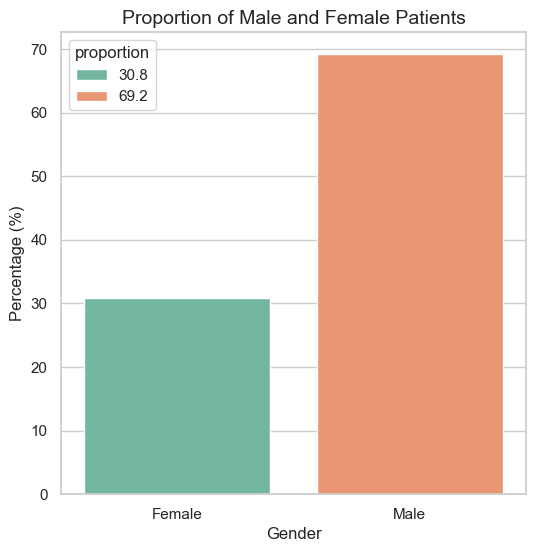

In [ ]:
# Proportion of Male and Female Patients
plt.figure(figsize=(6, 6))
gender_counts = round(data['sex'].value_counts(normalize=True) * 100, 1)
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2', hue=gender_counts)

# Set axis labels and plot title
plt.title('Proportion of Male and Female Patients', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

The distribution seen in our datset is in agreement with the known gender disparity seen in cardiac arrest (1).

Studies show men have approximately double the risk of out-of-hospital cardiac arrest (OHCA) compared to women.The annual incidence of SCD (sudden cardiac arrest) in women is estimated to be almost half that of men (2). The overall lifetime risk of 2:1 ratio between M:F remains throughout life (3).

Males experience cardiac arrest at higher rates than females due to a combination of biological and lifestyle factors.  This difference is linked to several cardiovascular risk factors, including higher rates of coronary artery disease, often due to factors like hypertension, higher cholesterol levels, and smoking prevalence, which are more common in men. These factors lead to a higher prevalence of coronary artery disease among men, which is a major cause of SCA (sudden cardiac arrest). Moreover, estrogen is thought to provide some cardiovascular protection in premenopausal women, which may delay the onset of such risks until post-menopause, narrowing the gap between sexes as age advances.

Another reason for the disparity is that men are more likely to experience heart attacks outside the hospital, while women often experience cardiac events at home.

Additionally, men are more likely to present with shockable rhythms (such as ventricular fibrillation), which are associated with a higher likelihood of survival if treated immediately, but also carry a higher risk of occurrence.

In summary, Contributors to cardiac death disparities between the sexes is multifactorial like physiological, personal, community and medico-profesional factors (1).

it is important to note, despite receiving comparable bystander CPR, outcomes and survival rates are generally lower for women, attributed to differences in initial cardiac rhythms, pathophysiological characteristics of females, more conservative treatment measures compared with males, and different post-resuscitation care for females post-resuscitation (4-5).

REFERENCES:

(1) Butters A, Arnott C, Sweeting J, Winkel BG, Semsarian C, Ingles J. Sex disparities in sudden cardiac death. Circulation: Arrhythmia and Electrophysiology. 2021 Aug;14(8):e009834.

(2) Haukilahti MA, Holmström L, Vähätalo J, Kenttä T, Tikkanen J, Pakanen L, Kortelainen ML, Perkiömäki J, Huikuri H, Myerburg RJ, Junttila MJ. Sudden cardiac death in women: causes of death, autopsy findings, and electrocardiographic risk markers. Circulation. 2019 Feb 19;139(8):1012-21.

(3) Bogle BM, Ning H, Mehrotra S, Goldberger JJ, Lloyd‐Jones DM. Lifetime risk for sudden cardiac death in the community. Journal of the American Heart Association. 2016 Jun 29;5(7):e002398.

(4) Lei H, Hu J, Liu L, Xu D. Sex differences in survival after out-of-hospital cardiac arrest: a meta-analysis. Critical care. 2020 Dec;24:1-3.

(5) Mody P, Pandey A, Slutsky AS, Segar MW, Kiss A, Dorian P, Parsons J, Scales DC, Rac VE, Cheskes S, Bierman AS. Gender-based differences in outcomes among resuscitated patients with out-of-hospital cardiac arrest. Circulation. 2021 Feb 16;143(7):641-9.

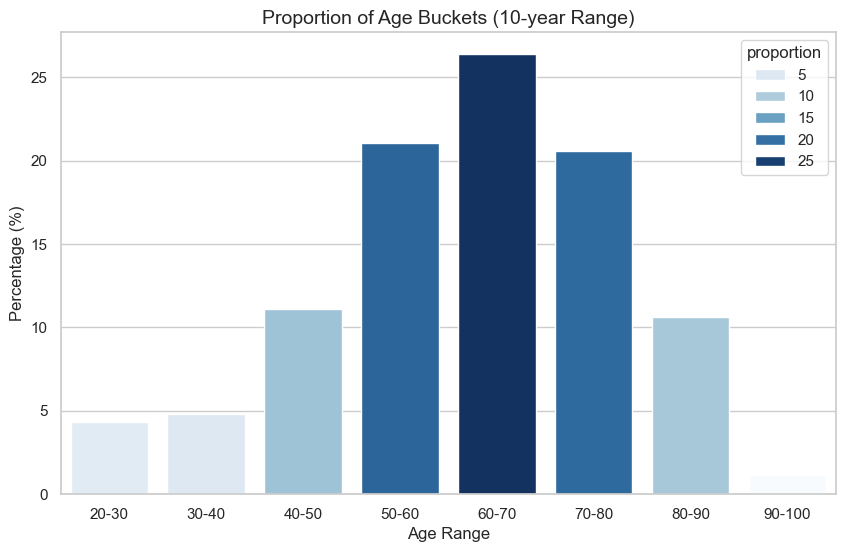

In [ ]:
# Create age buckets (bins of 10 years)
data['age_bucket'] = pd.cut(data['age'], bins=range(20, 101, 10), right=False, labels=[f'{i}-{i+10}' for i in range(20, 100, 10)])

# Plot the distribution of age buckets
plt.figure(figsize=(10, 6))
age_bucket_counts = data['age_bucket'].value_counts(normalize=True).sort_index() * 100
sns.barplot(x=age_bucket_counts.index, y=age_bucket_counts.values, palette='Blues', hue=age_bucket_counts)

# Set axis labels and plot title
plt.title('Proportion of Age Buckets (10-year Range)', fontsize=14)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

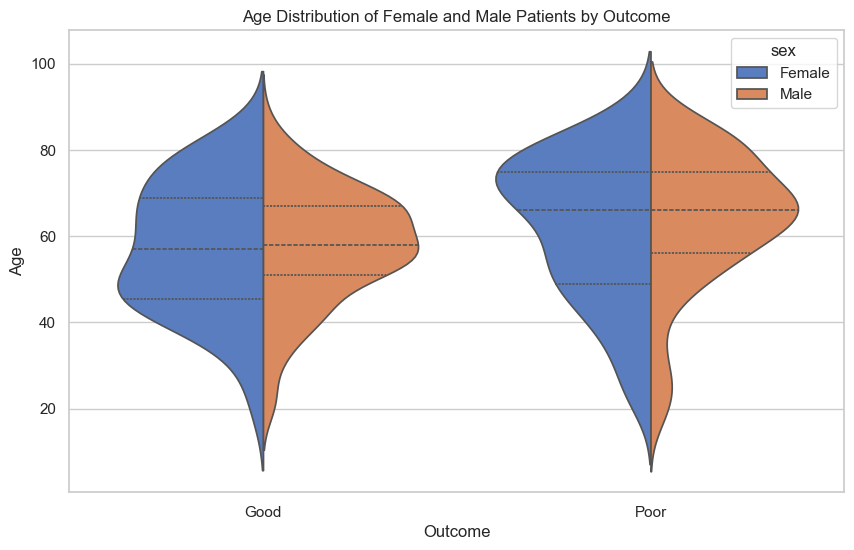

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the violin plot showing age distribution, dividing by gender
sns.violinplot(data=data, y="age", x="outcome", hue="sex", split=True, inner="quart")

# Set axis labels and plot title
ax.set_title('Age Distribution of Female and Male Patients by Outcome')
ax.set_xlabel("Outcome")
ax.set_ylabel("Age")

# Show the plot
plt.show()


#### Analysis of Age Distribution of Female and Male Patients by Outcome

#### Graph 1: Proportion of Male and Female Patients
- The majority of patients are **male** (69.2%), while **female** patients make up 30.8% of the population.
- This imbalance in gender distribution is important to consider when analyzing outcomes, as gender may have an influence on recovery after cardiac arrest.

#### Graph 2: Proportion of Age Buckets (10-year Range)
- The most represented age group is **60-70 years** (around 25% of patients), followed by **50-60 years** and **70-80 years**.
- Fewer patients are in the younger age groups (20-30 and 30-40 years) and the very elderly (90-100 years).
- This distribution shows that the majority of cardiac arrest patients are in the **50-80 year range**, indicating that older adults are more likely to experience cardiac arrest.

#### Graph 3: Age Distribution of Female and Male Patients by Outcome
- The violin plot above shows the **age distribution** of male (orange) and female (blue) patients divided by their outcome (Good or Poor).
- **Good Outcome**: The age distribution for both male and female patients is relatively symmetrical, with a higher concentration of patients in the **50-70 years** range. Both genders have a similar shape, indicating similar age distributions for those with good outcomes.
- **Poor Outcome**: The distribution for poor outcomes shows a wider spread in age, particularly for older patients (around **60-80 years**). The distribution for male patients (orange) seems slightly more spread out, particularly in older age groups.

#### Key Insights:
- The **gender distribution** is heavily skewed towards males, with a much larger proportion of male patients compared to females.
- The age distribution highlights that older adults, particularly those between **60-70 years**, make up the largest proportion of the patient population.
- **Gender Comparison**: The plot uses **different colors** (blue for female and orange for male) to differentiate between the two genders, allowing for easy visual comparison of their age distributions within each outcome category.
- The age distribution is similar between genders for patients with good outcomes. However, in the poor outcome group, **female patients** tend to have a slightly wider spread in the older age range.
- Comparing distributions for good and poor outcome, it appears that poor outcome patients tend to be in an older age range than those with good outcomes.
- This analysis suggests that **age** plays a role in outcome prediction, and there may be subtle gender differences in the age distribution of patients who experience good vs. poor outcomes.

This demographic analysis provides a baseline understanding of the population, helping us see whether certain age or gender groups are more likely to have good or poor outcomes after cardiac arrest.

In the literature, cardiac arrests outcomes shows a clear sex and age-related trend. The incidence of cardiac arrest generally increases with age, with the highest rates observed among those over 60. This increase is partly due to the prevalence of underlying cardiovascular conditions and other comorbidities that are more common in older adults. In a systematic review by JAMA Cardiology, the data indicate that long-term survival and favorable neurologic outcomes after cardiac arrest are more likely in younger patients compared to older ones, which points to age as a crucial factor in both incidence and survival rates after cardiac arrest (1).

With age, the cumulative impact of risk factors, such as hypertension, diabetes, and coronary artery disease, compounds the risk, making age a significant variable in cardiac arrest occurrence and prognosis (2).

Age and sex differences in cardiac arrest outcomes are well-documented, showing distinctive survival rates and factors impacting these outcomes. Men tend to experience out-of-hospital cardiac arrests (OHCA) at a younger average age than women, with most OHCAs occurring in men in their 50s and 60s, while women typically experience them in their 70s and 80s. Men generally present with more favorable predictors, such as witnessed arrests and shockable rhythms, contributing to higher survival rates, especially in OHCA settings. For instance, men have nearly double the chance of a shockable rhythm during OHCA, which is a strong predictor of survival to hospital discharge. Women, however, are more likely to experience cardiac arrests in private settings like home and present with non-shockable rhythms, both of which are associated with poorer outcomes (2-3).

In terms of age, younger patients (under 50) tend to have better overall survival rates following cardiac arrest compared to older populations. For women, outcomes improve slightly if the arrest is witnessed or when occurring in younger age brackets, especially due to potentially higher estrogen levels in premenopausal women, which may offer some neuroprotection. However, as women are often older at the time of cardiac arrest, the likelihood of non-cardiac causes such as respiratory or neurological events, which are less amenable to resuscitation, contributes to lower survival rates compared to men (3).

REFERENCES:

(1) Amacher SA, Bohren C, Blatter R, Becker C, Beck K, Mueller J, Loretz N, Gross S, Tisljar K, Sutter R, Appenzeller-Herzog C. Long-term survival after out-of-hospital cardiac arrest: a systematic review and meta-analysis. JAMA cardiology. 2022 Jun 1;7(6):633-43.

(2) Bogle BM, Ning H, Mehrotra S, Goldberger JJ, Lloyd‐Jones DM. Lifetime risk for sudden cardiac death in the community. Journal of the American Heart Association. 2016 Jun 29;5(7):e002398.

(3) Wittwer MR, Aldridge E, Hein C, Thorrowgood M, Zeitz C, Beltrame JF, Arstall MA. Sex differences in incidence and outcome of out-of-hospital cardiac arrest within a local health network. Frontiers in Cardiovascular Medicine. 2022 Apr 8;9:870696

### 1. Analysis of the Distribution of Good and Bad Outcomes


Understanding the overall distribution of outcomes in the dataset is crucial for building context around recovery trends after cardiac arrest. By visualizing the **balance between good and bad outcomes**, we can assess how frequently patients recover well versus how often they experience poor outcomes. This can guide further analysis into the factors that contribute to each type of outcome. It is also important to understand the class imbalance of the target value.

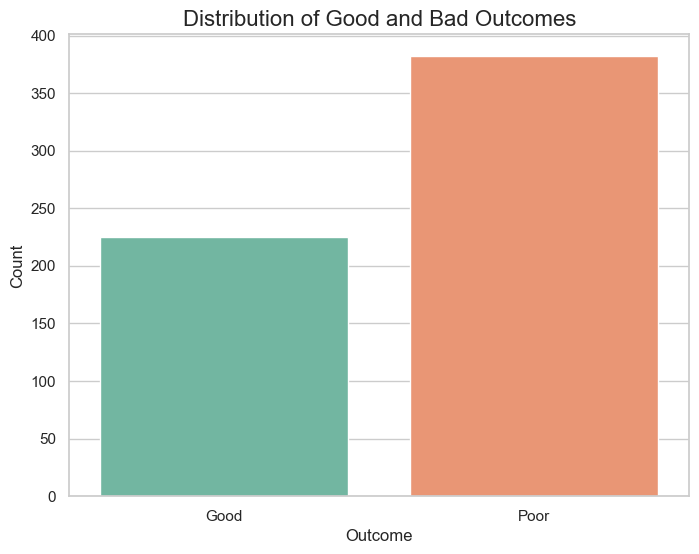

In [ ]:
# Create a plot for the distribution of good and bad outcomes
plt.figure(figsize=(8, 6))
sns.countplot(x='outcome', data=data, palette='Set2', hue='outcome')

# Set the title and labels
plt.title('Distribution of Good and Bad Outcomes', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

### Analysis of Distribution of Good and Bad Outcomes

The bar chart above shows the **distribution of outcomes** across the patient population. The two categories represented are **Good** and **Poor outcomes**.

- The dataset shows a **significant imbalance** between good and poor outcomes, with nearly **twice as many patients** experiencing poor outcomes as compared to good ones.
- This suggests that the majority of patients in the dataset have **worse recovery trajectories**, which may be due to several clinical, demographic, or treatment-related factors.

#### Key Insights:
- **Good Outcomes**: Around 200 patients experienced a good outcome, indicating a recovery with minimal neurological damage or a favorable recovery from cardiac arrest.
- **Poor Outcomes**: Approximately 400 patients had a poor outcome, representing the majority of the patient population.

Outcomes following cardiac arrest vary significantly across a range of factors, with survival rates generally low and substantial variability based on demographics and medical intervention conditions. While some studies have reported improvements in survival, cardiac arrests outcomes will depend on many factors such as the availability, response time, and skills of the emergency medical services (EMS), the presence of bystanders trained to perform cardiopulmonary resuscitation (CPR), or, for IHCA, skills and resources to handle cardiac arrests (1). Survival rates at hospital discharge after OHCA are approximately 3% in Asia, 6.8% in North America, 7.6% in Europe, and 9.7% in Australia, representing very low rates (2). Furthermore, survival to hospital discharge of patients with OHCA remains low, with in-hospital mortality of approximately 50% to 60% (3).

Many who survive to be discharged after a cardiac arrest might also suffer moderate to severe neurological impairments. Systems-level factors also contribute significantly to these outcomes. Patients receiving timely interventions at high-quality, well-resourced hospitals generally have more likelihood of better neurological outcomes.

REFERENCES:

(1) Jerkeman M, Sultanian P, Lundgren P, Nielsen N, Helleryd E, Dworeck C, Omerovic E, Nordberg P, Rosengren A, Hollenberg J, Claesson A. Trends in survival after cardiac arrest: a Swedish nationwide study over 30 years. European heart journal. 2022 Dec 7;43(46):4817-29.

(2) Horriar L, Rott N, Böttiger BW. Improving survival after cardiac arrest in Europe: The synergetic effect of rescue chain strategies. Resuscitation Plus. 2024 Mar 1;17:100533.

(3) Amacher SA, Bohren C, Blatter R, Becker C, Beck K, Mueller J, Loretz N, Gross S, Tisljar K, Sutter R, Appenzeller-Herzog C. Long-term survival after out-of-hospital cardiac arrest: a systematic review and meta-analysis. JAMA cardiology. 2022 Jun 1;7(6):633-43.










### 2. Feature Distribution Across the Dataset

This plot provides a comprehensive overview of the **distribution of all key features** in the dataset. It includes both **categorical** and **numerical** features, visualizing how frequently each category occurs or how the values of numerical features are spread across the patient population.

#### Purpose:
By showing the distribution of each feature, this graph helps us:
- Identify potential **imbalances** in the dataset (e.g., one category being overrepresented).
- Observe the **range of numerical variables** and check for any **skewness** or **outliers**.
- Ensure the dataset is clean and ready for more detailed analysis by spotting any **unexpected patterns** in the features.


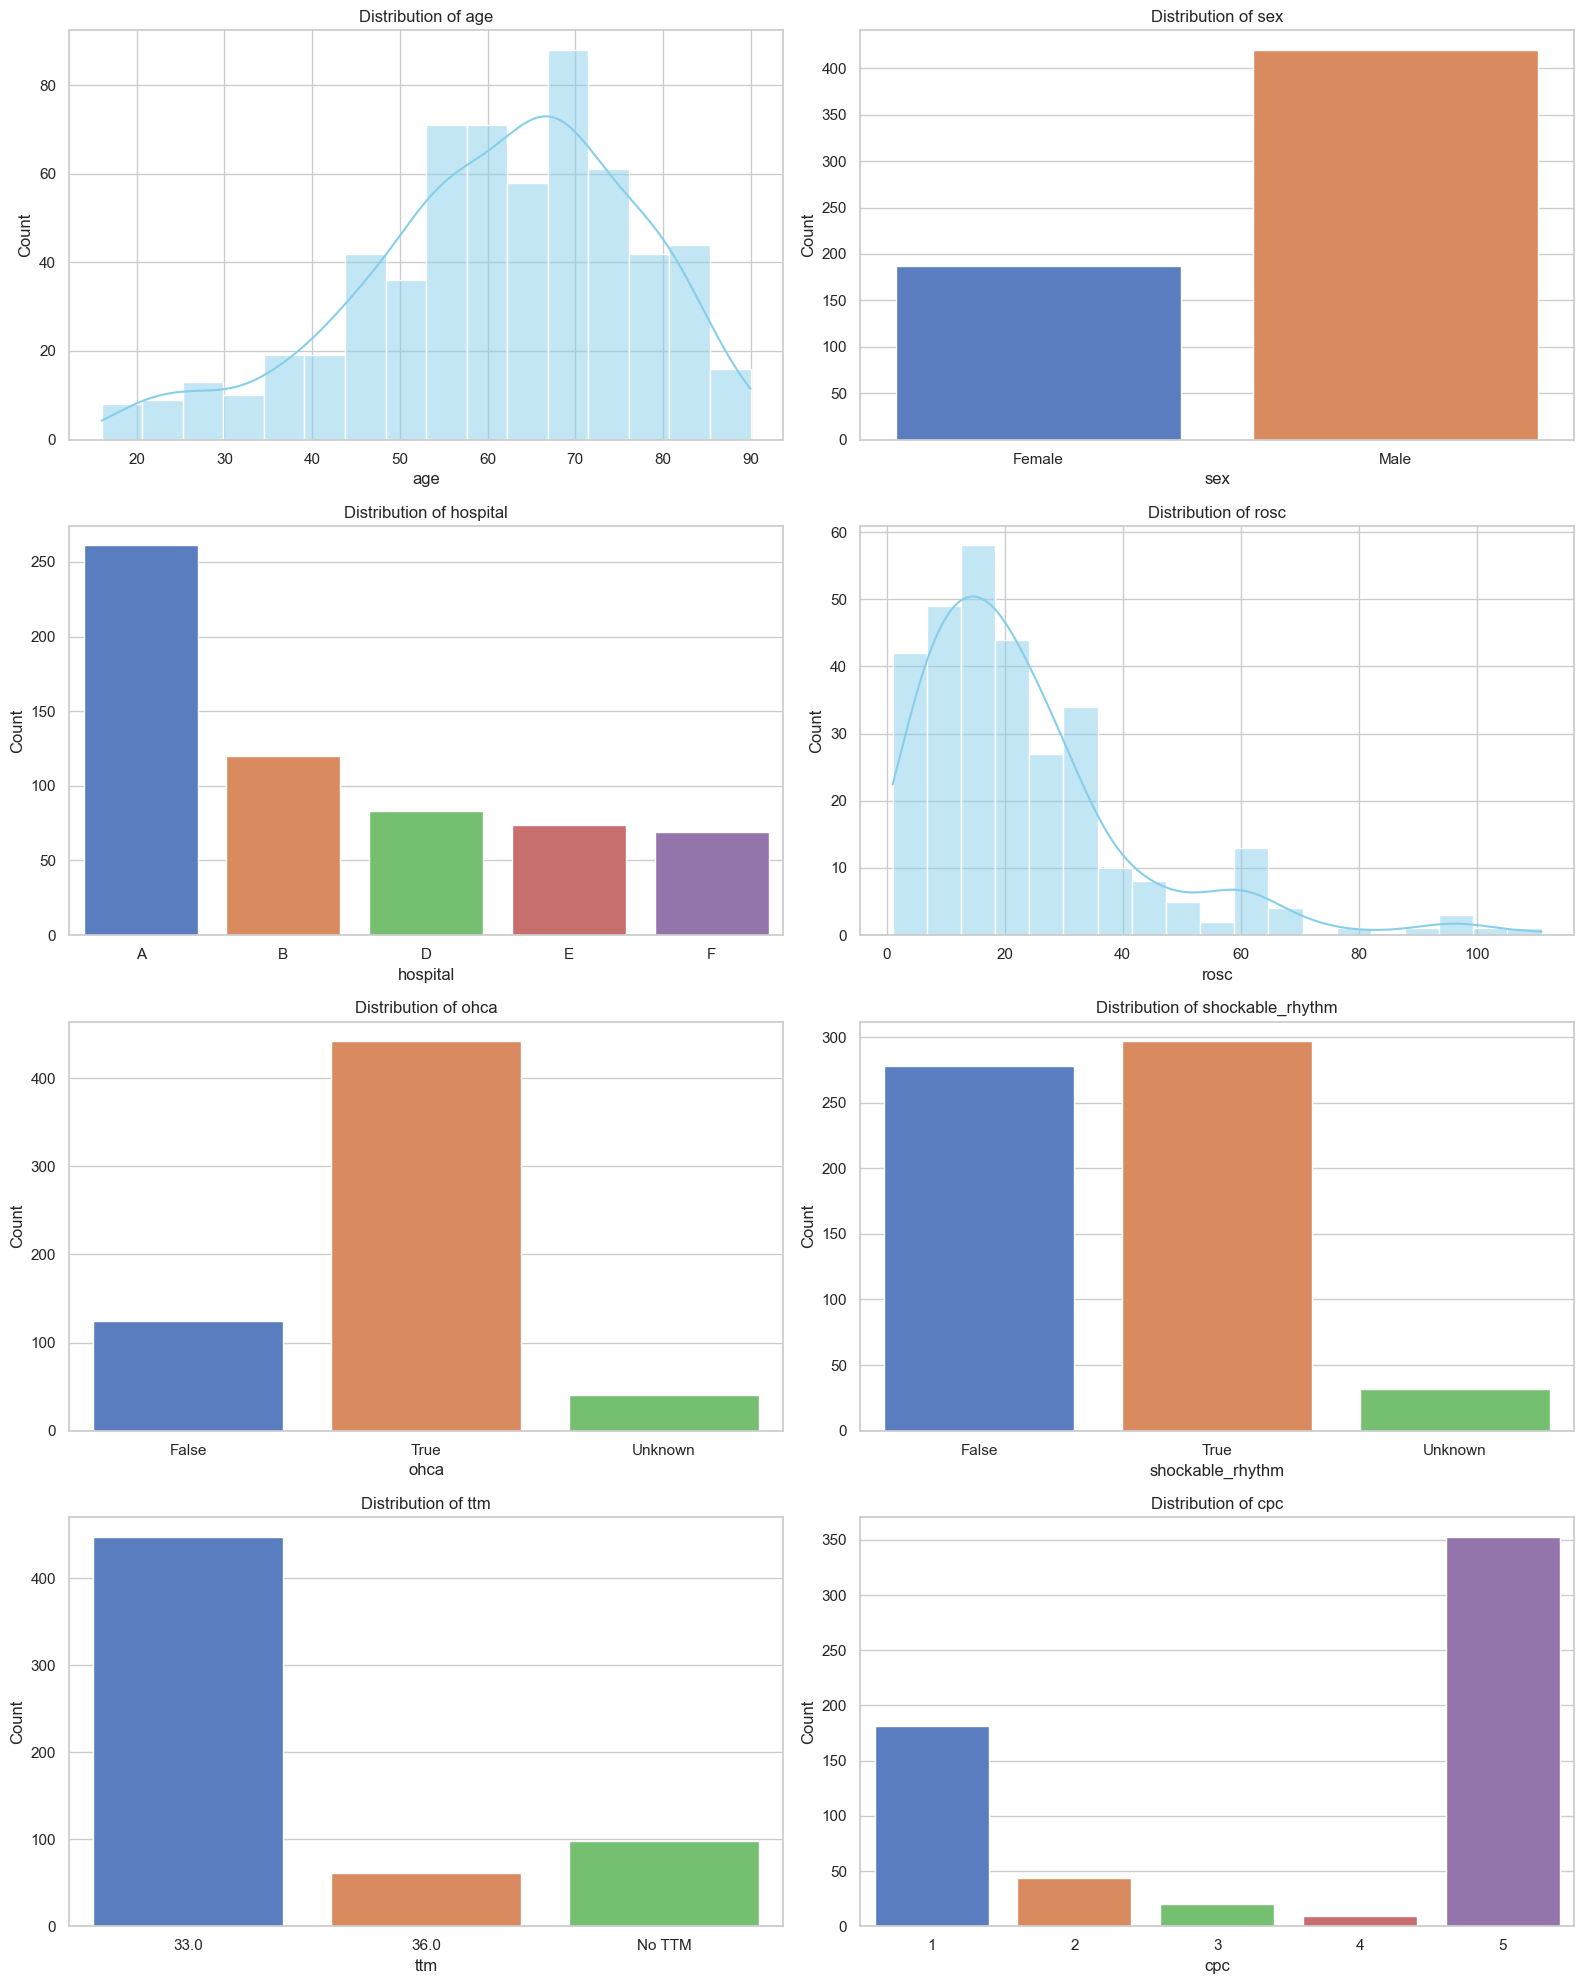

In [ ]:
# List of all relevant features (you can modify this list)
columns_to_plot = ['age', 'sex', 'hospital', 'rosc', 'ohca', 'shockable_rhythm', 'ttm', 'cpc']

# Set up the facet grid for multiple smaller graphs
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()  # Flatten the grid for easier indexing

# Loop over the columns and create a plot for each feature
for i, column in enumerate(columns_to_plot):
    if isinstance(data[column].dtype, pd.CategoricalDtype) or data[column].dtype == object:
        # For categorical features
        sns.countplot(data=data, x=column, ax=axes[i], hue=column, legend=False)
    else:
        # For numerical features
        sns.histplot(data=data, x=column, ax=axes[i], kde=True, color='skyblue')

    # Set the title for each plot
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In terms of feature distribution from above graphs, the following are observed:

  * A substantial proportion of patients in the dataset were aged between 50-75 years old. As mentioned in previous markdown age analysis, this is in agrrement with the literature regarding the age trend seen in cardiac arrest.
  * The dataset is imbalanced in terms of gender, however yet again, studies show men have approximately double the risk of out-of-hospital cardiac arrest compared to women (1-2).
  * Most of patients from dataset came from hospital A. We do not know the hospital locations or details to comment further regarding this distribution.
  * Most of patients in the dataset had ROSC less than 20 min. However, a decent proportion had ROSC between 20-40 min, with a spike at ROSC 60 min. The duration of ROSC is a critical predictor for survival and neurological outcomes after cardiac arrest. Generally, ROSC achieved within 20-30 min correlates with more favorable outcomes, while a ROSC time exceeding 30 minutes threshold significantly increases the risk of poor survival and adverse neurological prognosis if they survive, likely due to prolonged hypoxic injury (3-4).
  * There is quite disproportion betwwen OHCA vs IHCA. OHCA is almost 4 times more prevalent than IHCA in our dataset. This disproportion is also documented in the literature. The distribution between IHCA and OHCA varies widely by region, but in many countries, the incidence of OHCA is significantly higher than IHCA. Studies suggest that OHCAs represent the majority of cardiac arrest cases globally, partly because most cardiac emergencies occur outside of hospital settings. For instance, in the United States and Europe, about 70-90% of cardiac arrests occur outside the hospital (5).
  * The distribution between shockable and non-shockable rhytm in the dataset is quite balanced. In cardiac arrests, shockable rhythms—such as ventricular fibrillation (VF) or  ventricular tachycardia (VT) are observed less frequently than non-shckable rhythms like PEA (Pulseless electrical activity) and asystole, which are more common (6). Approximately 25% of CA are shockable rhytms and approximately 75% being non shockable (7).
  * TTM distribution is quite imbalanced in our dataset, TTM at 33 degrees is more than 8 times more prevalent than TTM used at 36 degrees or no TTM. TTM post CA use and advice has been variable in the literature across different regions (Europe, North America, Australia/NZ, Asia) (8-13), however,the latest European resuscitation council and European society of intensive care medicine guidelines, still states both IHCA and OHCA patients should be treated with TTM at 33 degrees (11). In our dataset, data was collected in 3 European hospitals (In the Netherlands and Belgium), therefore, it is not surprising to see this imbalance towards TTM at 33 degrees.
  * CPC distribution also shows an imbalance towards bad outcomes (CPC 4-5) which is almost twice as prevalent as good outcomes (CPC 1-2). Given the prevalence of OHCA in our dataset, this might be an expected distribution. Worldwide, survival after OHCA remains poor (14). Poor outomes patients are categorised as CPC 4-5, meaning they had unresponsive wakefulness syndrome (previously known as vegetative state) or were deceased. As also mentioned in a previous markdown, several key factors influence survival, including early high-quality cardiopulmonary resuscitation, the initial rhythm of cardiac arrest and early defibrillation (15). Based on a recent analysis, the mean global survival rate of patients with OHCA is 7.7% at 1 year after hospital discharge with variations worldwide (6). The incidence of ROSC, and survival to admission, survival to discharge, 1-month survival, and 1-year survival rates were 29.7%, 22.0%, 8.8%, 10.7%, and 7.7%, respectively and long-term survival to 10 years in patients surviving the initial hospital stay after OHCA was 62% to 64% (16). So not surprisingly, we have a great proportion of patients with poor outcome in our dataset, particularly given the proportion of patients with OHCA.



REFERENCES:

(1) Butters A, Arnott C, Sweeting J, Winkel BG, Semsarian C, Ingles J. Sex disparities in sudden cardiac death. Circulation: Arrhythmia and Electrophysiology. 2021 Aug;14(8):e009834.

(2) Haukilahti MA, Holmström L, Vähätalo J, Kenttä T, Tikkanen J, Pakanen L, Kortelainen ML, Perkiömäki J, Huikuri H, Myerburg RJ, Junttila MJ. Sudden cardiac death in women: causes of death, autopsy findings, and electrocardiographic risk markers. Circulation. 2019 Feb 19;139(8):1012-21.

(3) Beck A. Know this predictive tool for estimating survival after resuscitated cardiac arrest. American College of Cardiology [Internet]. 2021 Jan 25 [cited 2024 Oct 31]. Available from: https://www.acc.org/latest-in-cardiology/articles/2021/01/25/17/34/know-this-predictive-tool-for-estimating-survival-after-resuscitated-cardiac-arrest

(4) Chau PH, Wong OW, Lui M, Lai WH, Ng YY, Chen C, et al. Epidemiology of out-of-hospital cardiac arrest in Hong Kong: A two-year observational study. Hong Kong Med J [Internet]. 2023 Dec [cited 2024 Oct 31];29(6):564-72. Available from: https://www.hkmj.org/abstracts/v29n6/564.htm

(5) Benjamin EJ, Muntner P, Alonso A, Bittencourt MS, Callaway CW, Carson AP, et al. Heart Disease and Stroke Statistics—2019 Update: A Report From the American Heart Association. Circulation. 2019;139(10)

(6) Berdowski J, Berg RA, Tijssen JG, Koster RW. Global incidences of out-of-hospital cardiac arrest and survival rates: systematic review of 67 prospective studies. Resuscitation. 2010;81(11):1479-1487. doi:10.1016/j.resuscitation.2010.08.006.

(7) Gräsner JT, Lefering R, Koster RW, Masterson S, Böttiger BW, Herlitz J, Wnent J, Tjelmeland IB, Ortiz FR, Maurer H, Baubin M. EuReCa ONE⿿ 27 Nations, ONE Europe, ONE Registry: A prospective one month analysis of out-of-hospital cardiac arrest outcomes in 27 countries in Europe. Resuscitation. 2016 Aug 1;105:188-95.

(8) Australian and New Zealand Committee on Resuscitation (ANZCOR). Guideline 11.7 – Post-Resuscitation Therapy in Adult Advanced Life Support [Internet]. ANZCOR; 2021 [cited 2024 Oct 8]. Available from: https://www.anzcor.org/home/adult-advanced-life-support/guideline-11-7-post-resuscitation-therapy-in-adult-advanced-life-support/#Guideline

(9) Australian and New Zealand Committee on Resuscitation (ANZCOR). Guideline 11.8 – Targeted Temperature Management (TTM) After Cardiac Arrest [Internet]. ANZCOR; 2021 [cited 2024 Oct 8]. Available from: https://www.anzcor.org/home/adult-advanced-life-support/guideline-11-8-targeted-temperature-management-ttm-after-cardiac-arrest/

(10) Bernard SA, Gray TW, Buist MD, Jones BM, Silvester W, Gutteridge G, et al. Treatment of comatose survivors of out-of-hospital cardiac arrest with induced hypothermia. Circulation [Internet]. 2002 Feb 5 [cited 2024 Oct 8];108(2):118–21. Available from: https://www.ahajournals.org/doi/10.1161/CIRCULATIONAHA.108.190652

(11) Nolan JP, Sandroni C, Böttiger BW, Cariou A, Cronberg T, Friberg H, Genbrugge C, Haywood K, Lilja G, Moulaert VR, Nikolaou N. European resuscitation council and European society of intensive care medicine guidelines 2021: post-resuscitation care. Resuscitation. 2021 Apr 1;161:220-69.

(12) Leong SH, Chan E, Ho BC, Yeo C, Lew S, Sewa DW, Lim SL, Lee CW, Chia PL, Lim TS, Lee EK. Therapeutic temperature management (TTM): post-resuscitation care for adult cardiac arrest, with recommendations from the National TTM Workgroup. Singapore medical journal. 2017 Jul;58(7):408.

(13) Howes D, Gray SH, Brooks SC, Boyd JG, Djogovic D, Golan E, Green RS, Jacka MJ, Sinuff T, Chaplin T, Smith OM. Canadian Guidelines for the use of targeted temperature management (therapeutic hypothermia) after cardiac arrest: A joint statement from The Canadian Critical Care Society (CCCS), Canadian Neurocritical Care Society (CNCCS), and the Canadian Critical Care Trials Group (CCCTG). Resuscitation. 2016 Jan 1;98:48-63.

(14) Rea TD, Eisenberg MS, Sinibaldi G, White RD. Incidence of EMS-treated out-of-hospital cardiac arrest in the United States. Resuscitation. 2004 Oct 1;63(1):17-24.

(15) Amacher SA, Bohren C, Blatter R, Becker C, Beck K, Mueller J, Loretz N, Gross S, Tisljar K, Sutter R, Appenzeller-Herzog C. Long-term survival after out-of-hospital cardiac arrest: a systematic review and meta-analysis. JAMA cardiology. 2022 Jun 1;7(6):633-43.

(16) Yan S, Gan Y, Jiang N, Wang R, Chen Y, Luo Z, Zong Q, Chen S, Lv C. The global survival rate among adult out-of-hospital cardiac arrest patients who received cardiopulmonary resuscitation: a systematic review and meta-analysis. Critical care. 2020 Dec;24:1-3.


### 3. Feature Distribution Overview for Good and Bad Outcomes

#### What is being done:
To understand which patient features are associated with **good** and **bad outcomes**, we visualize the distribution of various features for both outcome groups. The dataset has been filtered to include only patients with either **good** or **poor outcomes**, and we generate plots for each feature to compare the two groups side by side.

#### Steps:
- **Data Filtering**: We filter the data to only include patients with **Good** or **Poor** outcomes.
- **Feature Selection**: The following features are selected for visualization: `age`, `sex`, `hospital`, `rosc`, `ohca`, `shockable_rhythm`, `ttm`, and `cpc`.
- **Plotting**:
  - **Categorical features** (e.g., `sex`, `hospital`, `shockable_rhythm`, `ttm`) are visualized using **count plots** to show the number of patients in each category for both outcomes.
  - **Numerical features** (e.g., `age`, `rosc`) are visualized using **histograms** with **Kernel Density Estimate (KDE)** curves to display their distributions for each outcome group.
- **Color Coding**: Different colors are used to distinguish between **good** and **poor outcomes**, allowing us to compare the distribution of each feature for the two groups.

#### Purpose:
This visualization helps us explore the key characteristics that differentiate patients with good outcomes from those with poor outcomes. By analyzing the distribution of each feature, we can gain insights into how demographic and clinical factors are associated with recovery after cardiac arrest.


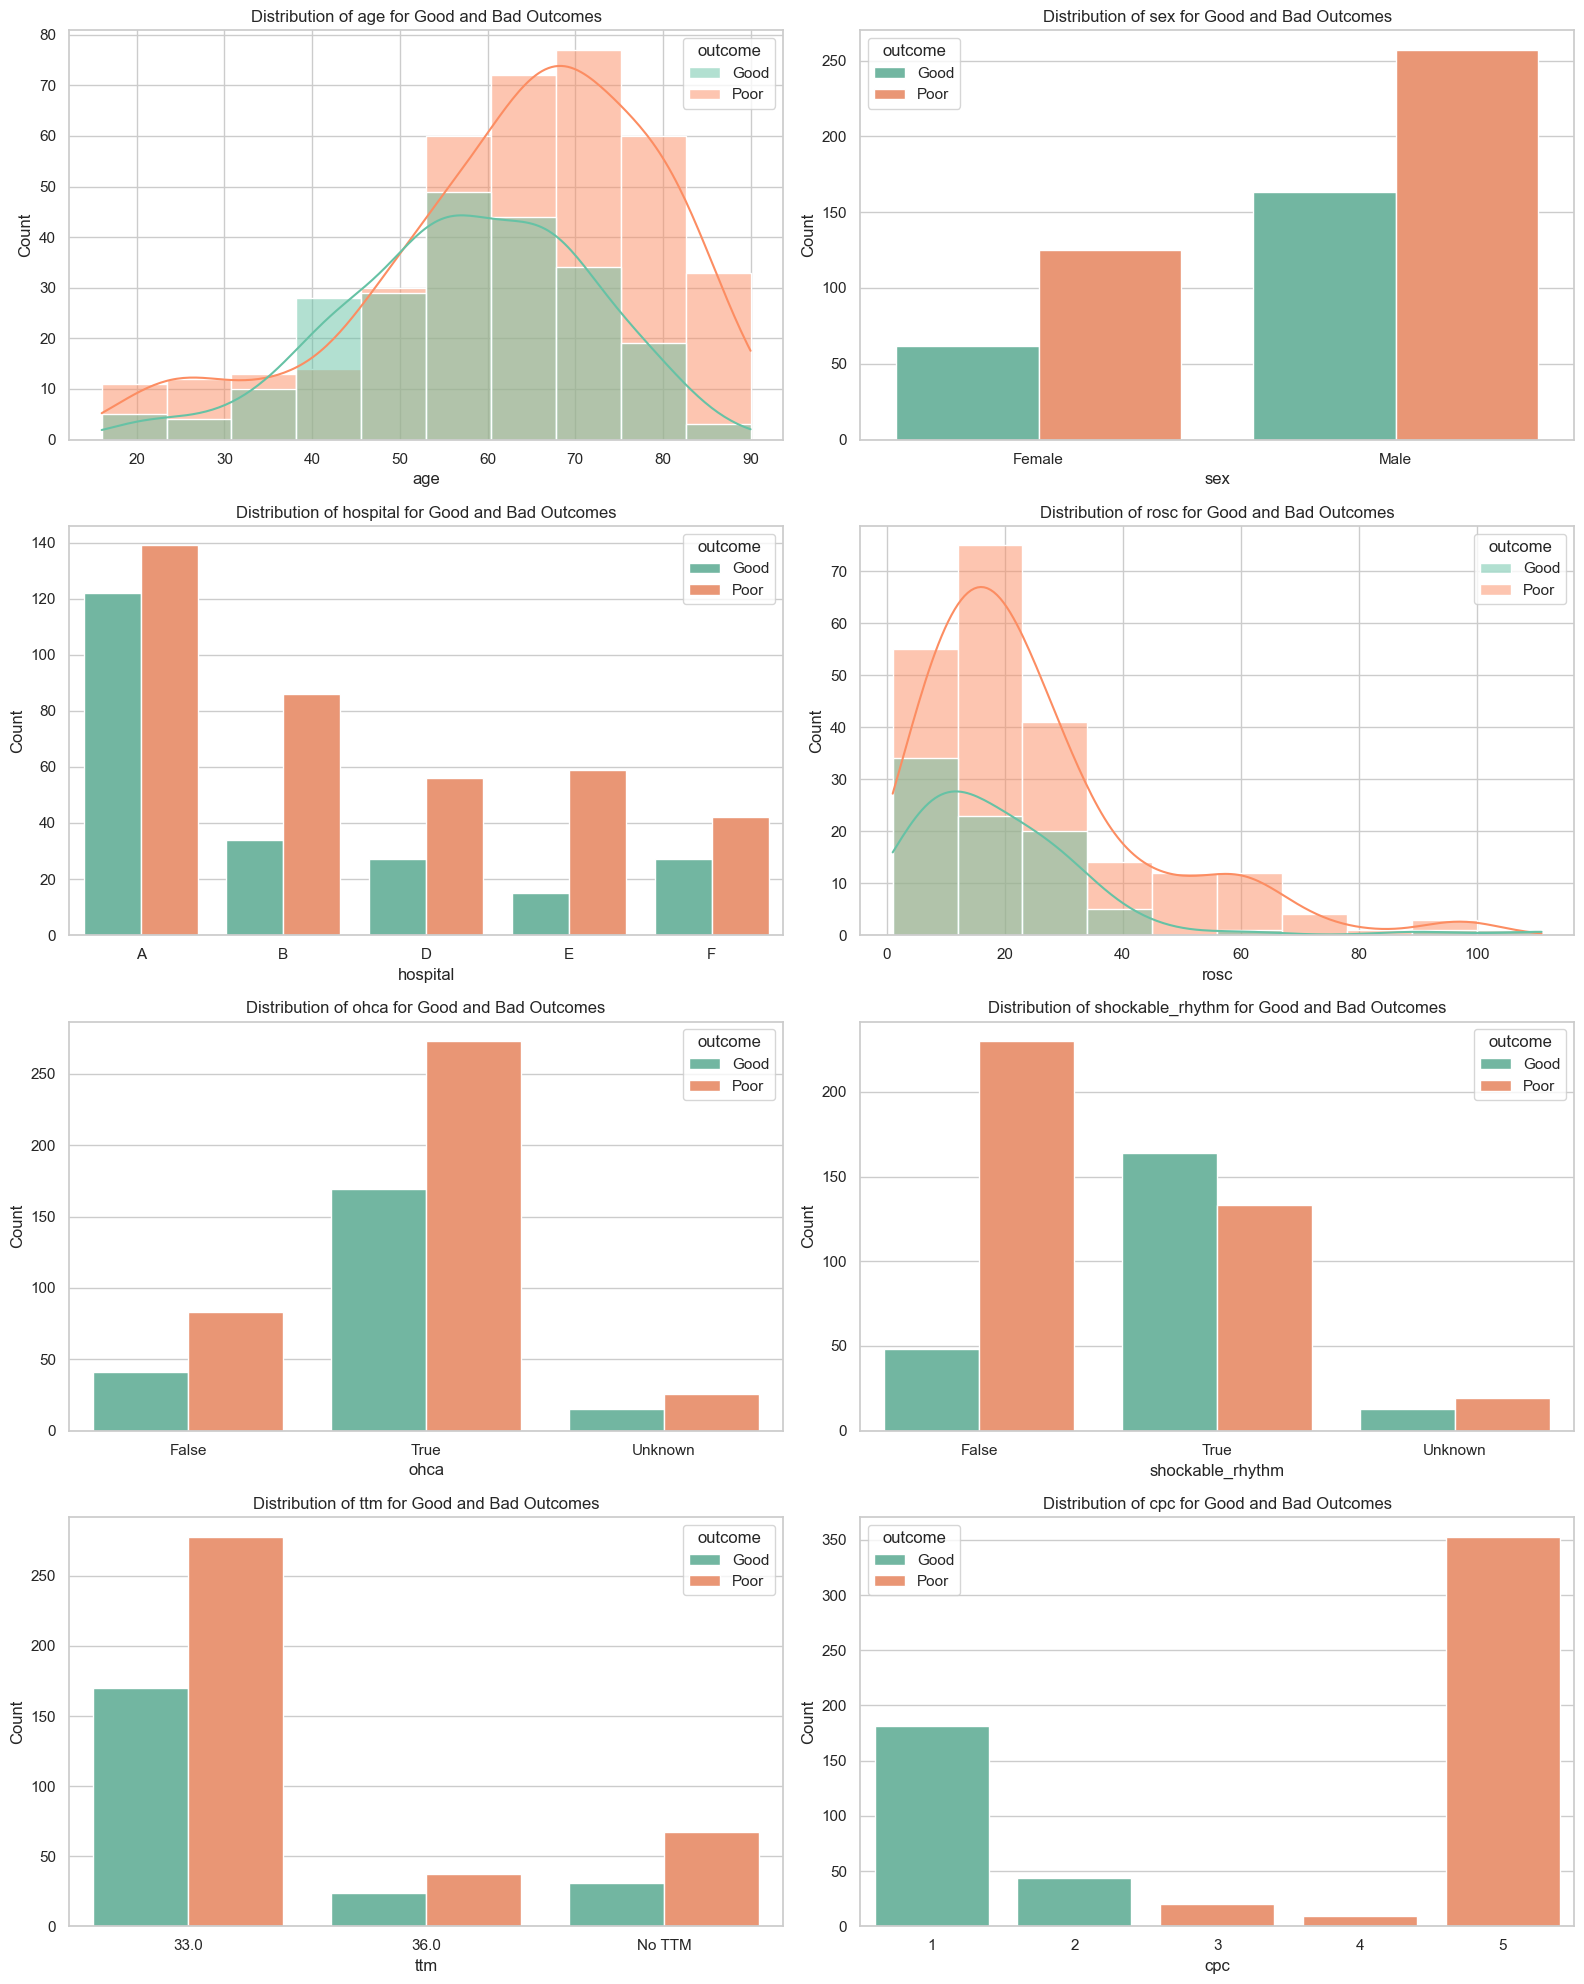

In [ ]:
# Create a filtered dataset for good and bad outcomes
outcome_data = data[data['outcome'].isin(['Good', 'Poor'])]

# Select the relevant columns for visualization (numerical and categorical)
columns_to_plot = ['age', 'sex', 'hospital', 'rosc', 'ohca', 'shockable_rhythm', 'ttm', 'cpc']

# Set up the facet grid for multiple smaller graphs
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()  # Flatten the grid for easier indexing

# Loop over the columns and create a plot for each feature
for i, column in enumerate(columns_to_plot):
    if isinstance(data[column].dtype, pd.CategoricalDtype) or data[column].dtype == object:
        sns.countplot(data=outcome_data, x=column, hue='outcome', ax=axes[i], palette='Set2')
    else:  # For numerical features
        sns.histplot(data=outcome_data, x=column, hue='outcome', ax=axes[i], bins=10, kde=True, palette='Set2')

    # Set the title for each plot
    axes[i].set_title(f'Distribution of {column} for Good and Bad Outcomes')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### 4. What is the distribution of age among patients, and does it vary by outcome?


Understanding the distribution of age in more detail in our patient population is important as age can be a critical factor in determining survival and recovery outcomes after cardiac arrest. By exploring this, we can gain insights into whether age impacts the likelihood of achieving a good or poor outcome. This will help us assess the role age plays in post-resuscitation care.

In this analysis, we will plot the distribution of age for all patients and then examine the distribution based on the neurological outcome (good vs. poor outcome).


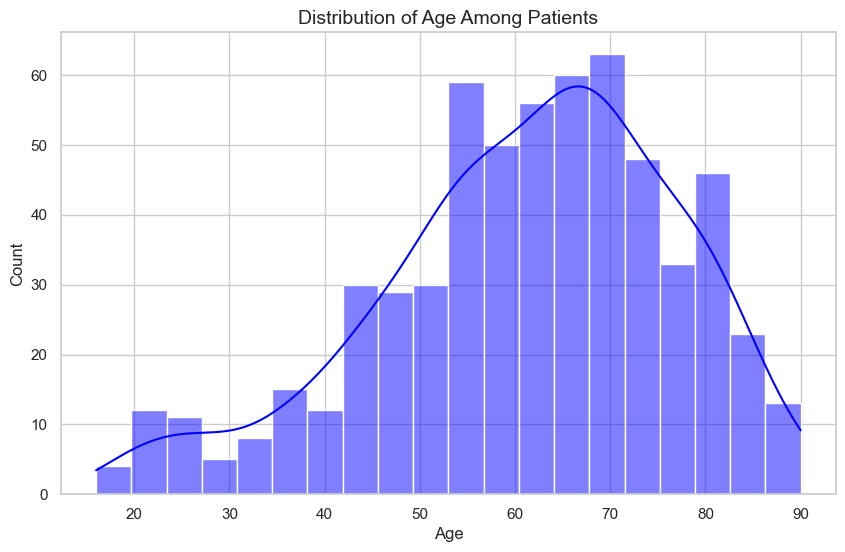

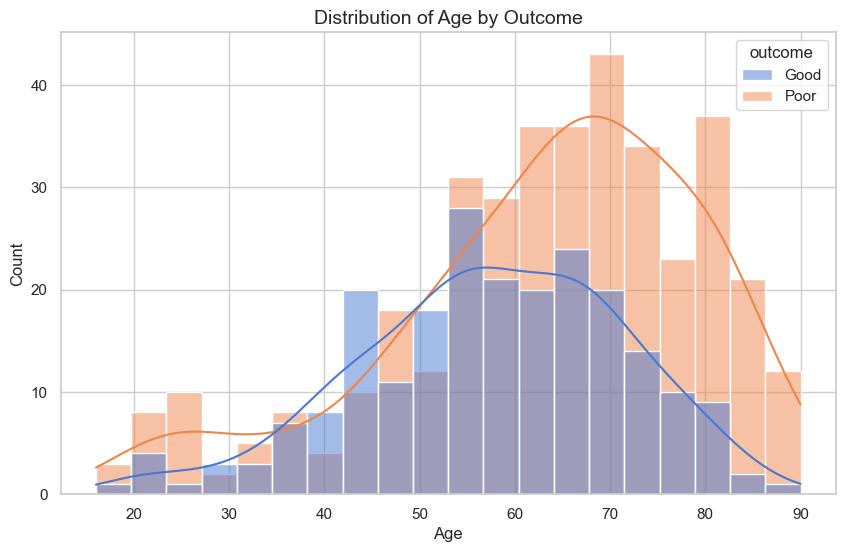

In [ ]:
# Plot the distribution of age overall
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age Among Patients', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Plot the distribution of age by outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='outcome', bins=20, kde=True)
plt.title('Distribution of Age by Outcome', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Analysis of Age Distribution

#### Graph 1: Overall Age Distribution
- The distribution of age is approximately **normal**, peaking around **60–70 years old**.
- Most patients fall between **50 and 80 years old**, with fewer in the younger (below 30) and older (above 80) age ranges.

#### Graph 2: Age Distribution by Outcome (Good vs Poor)
- **Good outcome** (blue): Peaks around **50-60 years old**; very few good outcomes in patients above 70.
- **Poor outcome** (orange): Peaks around **70-80 years old**; older patients tend to have worse outcomes.
- Younger patients (<60) are more likely to have a **good outcome**, while older patients (>70) tend to have a **poor outcome**.

#### Key Insights:
- **Age is a significant predictor** of outcome: Younger patients are more likely to recover well, while older patients are more prone to poor outcomes.


- The relationship between age and outcomes after cardiac arrest shows that older patients generally experience worse survival and neurological recovery rates compared to younger individuals. This pattern holds in both in-hospital cardiac arrests (IHCA) and out-of-hospital cardiac arrests (OHCA). For example, studies have found that patients over 85 have significantly lower survival rates, with only around 1.9% achieving favorable neurological outcomes after OHCA, compared to younger cohorts with higher survival and neurological recovery rates. The decline in outcomes with age is attributed to factors like decreased physiological resilience, higher prevalence of comorbid medical conditions, both which lead to a decrease QOL (quality of life) and survival compared with younger patients (1-2).

- Advanced age is an independent determinant of survival after resuscitation (3).

- Amongst young adults subgroups with a higher survival are those patients found in ventricular fibrillation in whom there was a cardiac aetiology. However, only one independent predictor of an increased chance of survival could be demonstrated in this age group which was ventricular fibrillation at the arrival of the rescue team. Only a limited percentage of patients suffering from out-of-hospital cardiac arrest are young adults. Only a small percentage of young subjects suffering from OHCA had a presumed cardiac aetiology compared with the general population. The most common clinically evident cause of cardiac arrest is drug overdose. These factors in young adults are associated with an increased chance of survival, with patients found in VF (ventricular fibrillation) the most important factor for an increased chance of survival (about five to 10 times increase of survival increase) (4).

REFERENCES:

(1) Herlitz J, Eek M, Engdahl J, et al. Factors at resuscitation and outcome among patients suffering from out of hospital cardiac arrest in relation to age. Resuscitation. 2003;58:309-317. doi:10.1016/S0300-9572(03)00127-4.

(2) Bunch TJ, White RD, Khan AH, Packer DL. Impact of age on long-term survival and quality of life following out-of-hospital cardiac arrest. Critical care medicine. 2004 Apr 1;32(4):963-7.

(3) O'KEEFFE S, Redahan C, Keane P, Daly K. Age and other determinants of survival after in-hospital cardiopulmonary resuscitation. QJM: An International Journal of Medicine. 1991 Dec 1;81(3):1005-10.

(4) Herlitz J, Svensson L, Silfverstolpe J, ÄNGQUIST KA, Wisten A, Engdahl J, Holmberg S. Characteristics and outcome amongst young adults suffering from out‐of‐hospital cardiac arrest in whom cardiopulmonary resuscitation is attempted. Journal of internal medicine. 2006 Nov;260(5):435-41.








### 5. Is there a relationship between ROSC (return of spontaneous circulation) time and patient outcome?


Time until ROSC is a critical factor in the recovery process after cardiac arrest. A longer ROSC time may indicate delayed resuscitation, or longer resuscitation with more epiephrin give, which could negatively impact the patient's outcome. By analyzing the relationship between ROSC time and neurological outcomes, we can better understand whether quicker return of circulation correlates with better recovery.

This analysis will help us identify any trends between ROSC time and outcome categories.


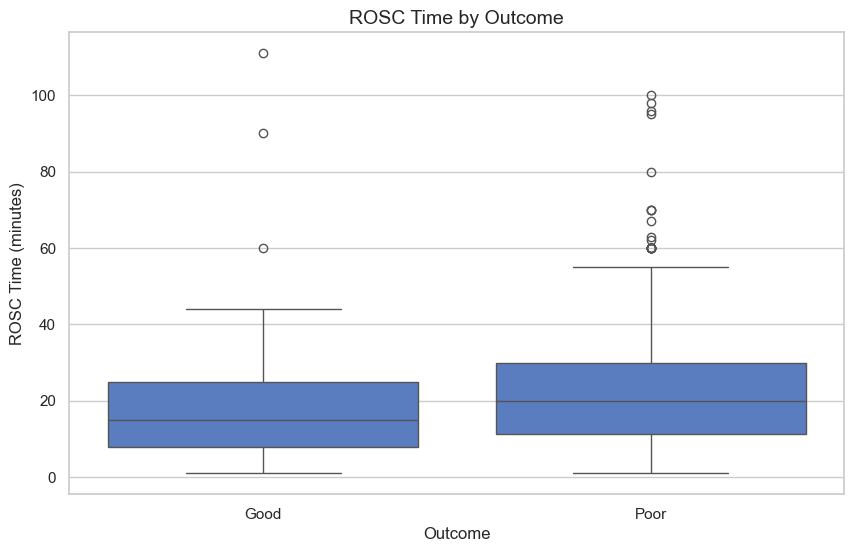

Median ROSC time by outcome (excluding -1 placeholder):
outcome
Good    15.0
Poor    20.0
Name: rosc, dtype: float64


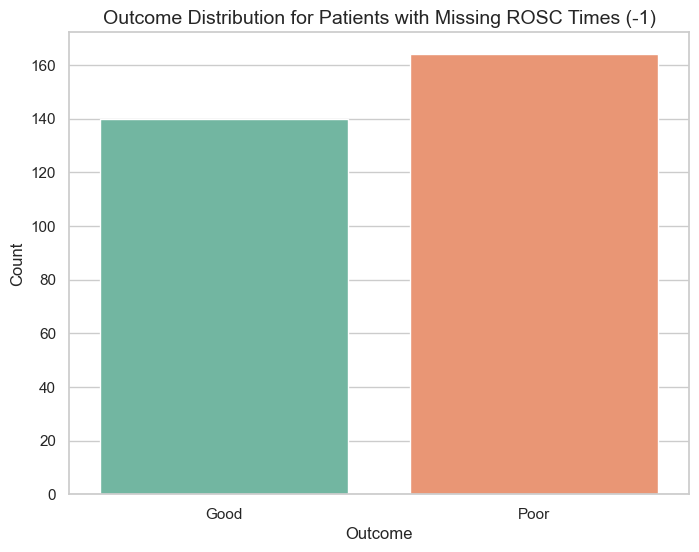

Percentage distribution of outcomes for patients with missing ROSC times (-1):
outcome
Poor    53.947368
Good    46.052632
Name: proportion, dtype: float64


In [ ]:
# Exclude ROSC placeholder (-1) values from the data
valid_data = data[data['rosc'] != -1]

# Box plot for ROSC time vs outcome using only valid ROSC data
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome', y='rosc', data=valid_data)
plt.title('ROSC Time by Outcome', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('ROSC Time (minutes)', fontsize=12)
plt.show()

# Calculate the median ROSC time for each outcome category, excluding -1
rosc_medians_cleaned = valid_data.groupby('outcome', observed=False)['rosc'].median()
print("Median ROSC time by outcome (excluding -1 placeholder):")
print(rosc_medians_cleaned)

# Filter out data where ROSC is missing (np.nan values)
missing_rosc_data = data[data['rosc'].isna()]

# Bar plot for the outcome distribution of patients with missing ROSC times (-1)
plt.figure(figsize=(8, 6))
sns.countplot(x='outcome', data=missing_rosc_data, palette='Set2', hue="outcome")
plt.title('Outcome Distribution for Patients with Missing ROSC Times (-1)', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Calculate the percentage of outcomes for patients with missing ROSC times (-1)
outcome_distribution_missing_rosc = missing_rosc_data['outcome'].value_counts(normalize=True) * 100
print("Percentage distribution of outcomes for patients with missing ROSC times (-1):")
print(outcome_distribution_missing_rosc)

### Analysis of ROSC Time and Outcome

#### Graph 1: ROSC Time by Outcome (Excluding -1)
- **Good Outcome**: The median ROSC time is **15 minutes**.
- **Poor Outcome**: The median ROSC time is **20 minutes**, and the overall spread is larger.
- **Key Insight**: Patients with poor outcomes tend to have a slightly longer ROSC time. The difference between good and poor outcomes is not drastic, but a higher ROSC time is associated with a poorer outcome.

#### Graph 2: Outcome Distribution for Patients with Missing ROSC Times (-1)
- **Poor Outcome**: **53.95%** of patients with missing ROSC times had poor outcomes.
- **Good Outcome**: **46.05%** had good outcomes.
- **Key Insight**: The distribution is relatively balanced, but more patients with missing ROSC times tend to have poor outcomes. Missing ROSC values might still carry important clinical significance.

These results highlight the importance of ROSC time and suggest that missing ROSC data may be linked to a slightly higher chance of poor outcomes. However, the difference in outcomes for those with missing ROSC data is not extreme, suggesting other factors may also be influencing the results.


### 6. How does the application of TTM (Targeted Temperature Management) vary across patient outcomes?


TTM is a key therapeutic intervention in post-cardiac arrest care. By analyzing how different TTM levels (33 Degree, 36 Degree, or No TTM) are applied across patient outcomes, we can assess whether certain temperature management strategies are associated with better recovery. This can give us insight into the effectiveness of TTM in different patient subgroups and contribute to understanding optimal care strategies.


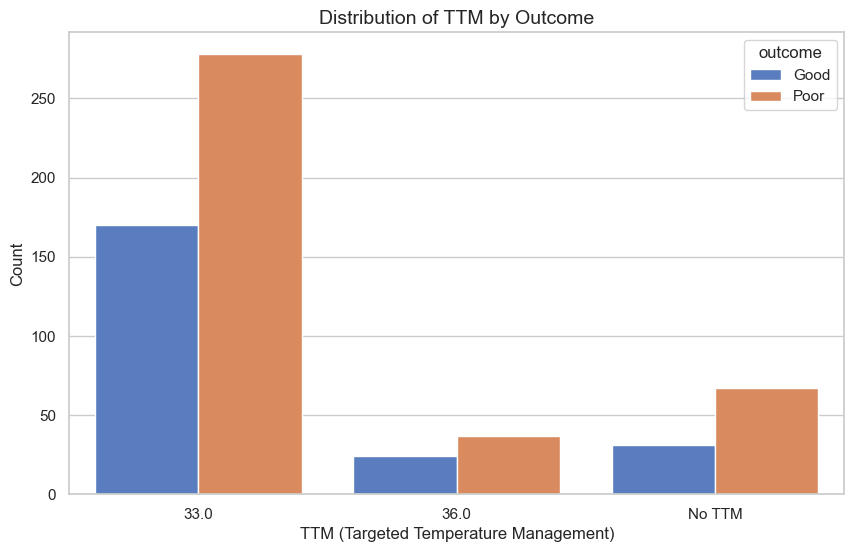

Percentage distribution of outcomes within each TTM category:
outcome       Good       Poor
ttm                          
33.0     37.946429  62.053571
36.0     39.344262  60.655738
No TTM   31.632653  68.367347


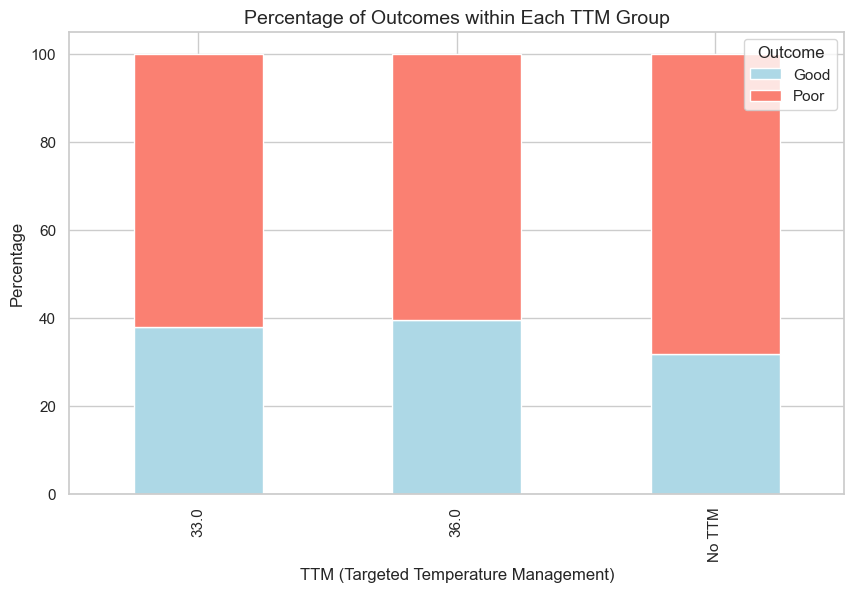

In [ ]:
# Bar plot for TTM application by outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='ttm', hue='outcome', data=data)
plt.title('Distribution of TTM by Outcome', fontsize=14)
plt.xlabel('TTM (Targeted Temperature Management)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Percentage of TTM usage by outcome within each TTM group
ttm_outcome_distribution = data.groupby('ttm', observed=False)['outcome'].value_counts(normalize=True).unstack()

# Convert to percentages and display
ttm_outcome_distribution = ttm_outcome_distribution * 100
print("Percentage distribution of outcomes within each TTM category:")
print(ttm_outcome_distribution)

# Visualizing the percentage distribution as a stacked bar plot
ttm_outcome_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Percentage of Outcomes within Each TTM Group', fontsize=14)
plt.xlabel('TTM (Targeted Temperature Management)', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Outcome', loc='upper right')
plt.show()

### Analysis of TTM (Targeted Temperature Management) by Outcome

#### Graph 1: Distribution of TTM by Outcome
- **33 Degree TTM**: The largest group, with more patients having a **poor outcome** (62.05%) compared to a **good outcome** (37.95%).
- **36 Degree TTM**: Similar pattern, but with a slightly higher proportion of good outcomes (39.34% good vs. 60.66% poor).
- **No TTM**: Has the highest proportion of poor outcomes (68.37%) compared to 31.63% good outcomes.

#### Graph 2: Percentage of Outcomes within Each TTM Group
- The proportion of **poor outcomes** is higher across all groups, with **No TTM** showing the highest percentage of poor outcomes.
- **33 Degree TTM** and **36 Degree TTM** have slightly better outcomes compared to No TTM, but still a majority of patients in these groups have poor outcomes.

#### Key Insight:
- **TTM at 33 and 36 Degrees**: Both seem to result in similar outcome distributions, with **33 Degree TTM** showing slightly worse outcomes than **36 Degree TTM**.
- **No TTM**: Patients who did not receive TTM have the worst outcomes, suggesting that the absence of TTM may be associated with poorer recovery.

TTM has been a controversial topic in certain groups of cardiac arrest patients, because its implementation despite weak strenght and low validity reserach to support its advice. In 2002, two landmark trials were published showing that lowering body temperature to 33 °C improved neurological outcome and saved lives in comatose survivors of out-of-hospital cardiac arrest with shockable rhytms (1,2).
This therapy was rapidly adopted by international guidelines and not questioned until a systematic review using the GRADE methodology and trial sequential analysis showed that the quality of the evidence for treating cardiac arrest patients at 33 °C was low (3).

This led to the design of a new trial, randomizing patients to two controlled temperatures, 33 and 36 °C. The Target Temperature Management after Out-of-hospital Cardiac Arrest trial (TTM-trial) included and randomized 950 patients in 27 months, almost three times the number of the two previous trials combined (4). 32 sites enrolled patients in nine countries in Europe plus Australia. The TTM trial differs from previous trials in several aspects, the most important one being that all patients received controlled temperature management avoiding fever in both intervention arms. TTM trial showed no difference in survival or neurological outcome could be detected when comatose patients after cardiac arrest were treated at either 33 or 36 °C, in unconscious survivors of out-of-hospital cardiac arrest of presumed cardiac cause.

The rationale for changing to 36 °C is that this temperature is closer to normal and less invasive, reducing known and unknown risks. The number and severity of adverse events in the two intervention arms did not differ in the TTM trial, although there was a tendency towards less events in the 36° arm. Treating the patients closer to normal temperatures allows for predictable drug effects, including those of sedatives and antithrombotic therapy.

In a published post hoc analysis of the TTM trial of the subgroup of patients in circulatory shock at admission, a higher mortality at ICU discharge was suggested in the 33 °C arm (5).

Moderate therapeutic hypothermia is currently recommended to improve neurologic outcomes in adults with persistent coma after resuscitated out-of-hospital cardiac arrest. However, the effectiveness of moderate therapeutic hypothermia in patients with nonshockable rhythms (asystole or pulseless electrical activity) is debated. A French study in 2019 conducted an open-label, randomized, controlled trial comparing moderate therapeutic hypothermia (33°C during the first 24 hours) with targeted normothermia (37°C) in patients with coma who had been admitted to the intensive care unit (ICU) after resuscitation from cardiac arrest with nonshockable rhythm (6). This is the basis of the European Resuscitation Council and European Society of Intensive Care Medicine Guidelines Post-resuscitation care to recommend TTM at 32 to 36 degress to all rhythms and locations post CA. However, the issue with this study is that they compared hypothermia of 33 degrees to targeted normothermia (37 degrees), not to targeted hypothermia at higher temperatures (36 degrees).

To this day, it cannot be excluded that subgroups post CA may benefit from TTM higher than 33 °C but lower or equal than 36 °C, particularly in an heterogeneous group of patients like OHCA patients with non shockable rhythm. The optimal temperature in this group still debated. Whether certain subpopulations of cardiac arrest patients may benefit from lower (32-34 °C) or higher (36 °C) temperatures remains unknown, and further research will have to elucidate this (7).

Our data driven approach study will try to identify if there is a difference in outcomes using 2 different temperatures (33 °C vs 36 °C) and if certain subgroups of CA patients will respond more favorably to certain temperature of TTM. By leveraging in the use of AI/ML, our aim is to identify groups of patients post CA who will benefit from a particular targeted intervention,what patient subpopulation can be identified from the data that profits from certain targeted temperature management.

It is worth to mention, a TTM 2 trial is being conducted currently, no results released yet. However, this study is still comparing hypothermia to 33°C with normothermia and early treatment of fever (≥37.8°C) after out-of-hospital cardiac arrest (8).

REFERENCES:

(1) Bernard SA, Gray TW, Buist MD, Jones BM, Silvester W, Gutteridge G, Smith K. Treatment of comatose survivors of out-of-hospital cardiac arrest with induced hypothermia. New England journal of medicine. 2002 Feb 21;346(8):557-63.

(2) Hypothermia after Cardiac Arrest Study Group. Mild therapeutic hypothermia to improve the neurologic outcome after cardiac arrest. New England Journal of Medicine. 2002 Feb 21;346(8):549-56.

(3) Nielsen N, Friberg H, Gluud C, Herlitz J, Wetterslev J. Hypothermia after cardiac arrest should be further evaluated—a systematic review of randomised trials with meta-analysis and trial sequential analysis. International journal of cardiology. 2011 Sep 15;151(3):333-41.

(4) Nielsen N, Wetterslev J, Cronberg T, Erlinge D, Gasche Y, Hassager C, Horn J, Hovdenes J, Kjaergaard J, Kuiper M, Pellis T. Targeted temperature management at 33 C versus 36 C after cardiac arrest. New England journal of medicine. 2013 Dec 5;369(23):2197-206.

(5) Annborn M, Bro-Jeppesen J, Nielsen N, Ullén S, Kjaergaard J, Hassager C, Wanscher M, Hovdenes J, Pellis T, Pelosi P, Wise MP. The association of targeted temperature management at 33 and 36 C with outcome in patients with moderate shock on admission after out-of-hospital cardiac arrest: a post hoc analysis of the Target Temperature Management trial. Intensive care medicine. 2014 Sep;40:1210-9.

(6) Lascarrou JB, Merdji H, Le Gouge A, Colin G, Grillet G, Girardie P, Coupez E, Dequin PF, Cariou A, Boulain T, Brule N. Targeted temperature management for cardiac arrest with nonshockable rhythm. New England Journal of Medicine. 2019 Dec 12;381(24):2327-37.

(7) Nolan JP, Sandroni C, Böttiger BW, Cariou A, Cronberg T, Friberg H, Genbrugge C, Haywood K, Lilja G, Moulaert VR, Nikolaou N. European resuscitation council and European society of intensive care medicine guidelines 2021: post-resuscitation care. Resuscitation. 2021 Apr 1;161:220-69.

(8) Dankiewicz J, Cronberg T, Lilja G, Jakobsen JC, Bělohlávek J, Callaway C, Cariou A, Eastwood G, Erlinge D, Hovdenes J, Joannidis M. Targeted hypothermia versus targeted Normothermia after out-of-hospital cardiac arrest (TTM2): A randomized clinical trial—Rationale and design. American heart journal. 2019 Nov 1;217:23-31.



### 7. Does the presence of a shockable rhythm affect the patient’s outcome?


The type of rhythm at the time of cardiac arrest (shockable vs non-shockable) plays a critical role in resuscitation success. Shockable rhythms (such as ventricular fibrillation) are often associated with better survival outcomes if treated early. This analysis explores whether patients presenting with a shockable rhythm have a higher likelihood of a good outcome.


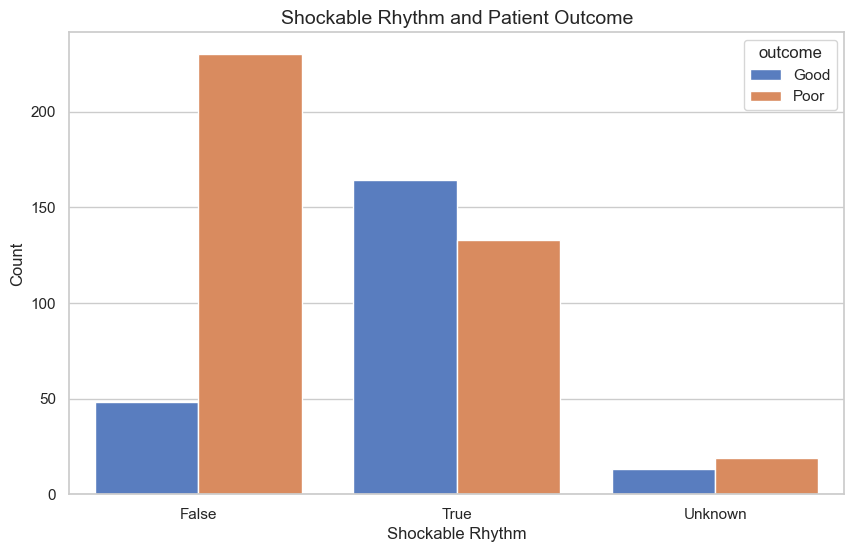

Percentage distribution of outcome by Shockable Rhythm:
outcome               Good      Poor
shockable_rhythm                    
False             0.172662  0.827338
True              0.552189  0.447811
Unknown           0.406250  0.593750


C:\Users\kentf\AppData\Local\Temp\ipykernel_19448\3510899676.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shockable_rhythm_outcome = data.groupby('shockable_rhythm')['outcome'].value_counts(normalize=True).unstack()


In [ ]:
# Bar plot for Shockable Rhythm vs Outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='shockable_rhythm', hue='outcome', data=data)
plt.title('Shockable Rhythm and Patient Outcome', fontsize=14)
plt.xlabel('Shockable Rhythm', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Calculate percentage of outcomes for each rhythm type
shockable_rhythm_outcome = data.groupby('shockable_rhythm')['outcome'].value_counts(normalize=True).unstack()
print("Percentage distribution of outcome by Shockable Rhythm:")
print(shockable_rhythm_outcome)

### Analysis of Shockable Rhythm and Patient Outcome

#### Graph: Shockable Rhythm and Patient Outcome
- **False (Non-shockable Rhythm)**: A large majority of patients (82.73%) with non-shockable rhythms had poor outcomes, while only 17.27% had good outcomes.
- **True (Shockable Rhythm)**: A significantly better distribution, with 55.22% of patients having good outcomes and 44.78% having poor outcomes. This suggests that patients with shockable rhythms have a higher chance of recovery.
- **Unknown**: The outcomes are more balanced, with 40.63% having good outcomes and 59.38% poor outcomes. This could indicate that there is a mix of patients with and without shockable rhythms, more without shockable rhythm.

#### Key Insights:
- **Shockable Rhythms**: Patients with shockable rhythms are much more likely to have **good outcomes** compared to those with non-shockable rhythms.
- **Non-shockable Rhythms**: These rhythms are associated with a significantly higher proportion of poor outcomes.
- **Unknown Data**: The "Unknown" category shows a relatively even distribution but leans towards poorer outcomes.

Overall, the presence of a shockable rhythm appears to be a critical factor in improving outcomes after cardiac arrest.

In the last 20 years, multiple publications have shown a considerable decline in initial shockable rhythms (ISR) and a concurrent increase in initial NSR (non shockable rhythms) (1-3).

NSR acoount for up to 75% of all registered initial rhythms (5,6). In the literature, NSR are commonly associated with poor prognosis (7). Therefore, literature supports our dataset findings (NSR are associated with significantly higher proportion of poor outcomes). This is often attributed to factors like prolonged low-flow time and the greater prevalence of non-cardiac causes of arrest, such as respiratory failure or metabolic disturbances which might be harder to treat and survive from. Non-shockable rhythms are often approached as a single, uniform category. However, they shoul not be approached this way. Until we are able to make greater progress in the biology and risk markers for conditions such as PEA and asystole, outcomes for at-risk populations will probably remain poor (8).

In the acute care settings like emergency departments and ICU, practitioners use a mnemonic that focuses on the causes of PEA by recalling the ‘Hs and Ts’ (hypovolaemia, hypoxia, tamponade, and tension pneumothorax, to name a few), but also there is a role of genetics and epigenetics. Deeper phenotyping and molecular characterization of the terminal rhythms of life may identify other clinical factors that predispose a patient to either have VT, VF, PEA, or asystole (8). Presenting rhythms at the time of an OHCA may help to maximize the potential of proteomic and genomic technologies to provide a molecular understanding similar to how they are being employed in other conditions such as atrial fibrillation and coronary artery disease (9).

Shockable rhythms, such as ventricular fibrillation (VF) or pulseless ventricular tachycardia (VT), generally associated with better survival and neurological outcomes as they often have a greater likelihood of achieving return of spontaneous circulation (ROSC) earlier. Also, these patient population most commonly have a cardiac aetiology as the reason for the CA, particularly coronary disease (10). Furthermore, approximately 1 of every 4 to 7 patients with a presenting rhythm of VF/VT survive to hospital discharge, compared to only 1 of every 21 to 500 patients found in asystole. Prompt provision of CPR delays the degradation of tachyarrythmias to asystole, this may explain why bystander CPR and prehospital defibrillation have such a positive impact on survival. The association strengt between VF/VT and survival was greatest in locations in which a defibrillator is available at public sites (11).

Lastly, the conversion from an initial NS to a shockable rhythm can have a noteworthy impact on both short and long term survival rates (12). The rhythm conversion rate varies, but studies have shown higher conversion rates when pulseless electrical activity (PEA) was the initial rhythm compared to asystole (13). Spontaneous conversion of heart rhythm (not a result of electrical defibrillation) is not uncommon during cardiac arrest. For some populations, conversion to shockable rhythms can take place during cardiopulmonary resuscitation (CPR) in up to 15%–26% of OHCA patients with initial non-shockable rhythms (14).

REFERENCES:

(1) Gräsner JT, Lefering R, Koster RW, Masterson S, Böttiger BW, Herlitz J, Wnent J, Tjelmeland IB, Ortiz FR, Maurer H, Baubin M. EuReCa ONE⿿ 27 Nations, ONE Europe, ONE Registry: A prospective one month analysis of out-of-hospital cardiac arrest outcomes in 27 countries in Europe. Resuscitation. 2016 Aug 1;105:188-95.

(2) Herlitz J, Engdahl J, Svensson L, Young M, Ängquist KA, Holmberg S. Decrease in the occurrence of ventricular fibrillation as the initially observed arrhythmia after out-of-hospital cardiac arrest during 11 years in Sweden. Resuscitation. 2004 Mar 1;60(3):283-90.

(3) Teodorescu C, Reinier K, Dervan C, Uy-Evanado A, Samara M, Mariani R, Gunson K, Jui J, Chugh SS. Factors associated with pulseless electric activity versus ventricular fibrillation: the Oregon sudden unexpected death study. Circulation. 2010 Nov 23;122(21):2116-22.

(4) Mader TJ, Nathanson BH, Millay S, Coute RA, Clapp M, McNally B. Out-of-hospital cardiac arrest outcomes stratified by rhythm analysis. Resuscitation. 2012 Nov 1;83(11):1358-62.

(5) Cournoyer A, Cossette S, Potter BJ, Daoust R, de Montigny L, Londei-Leduc L, Lamarche Y, Ross D, Morris J, Chauny JM, Sokoloff C. Prognostic impact of the conversion to a shockable rhythm from a non-shockable rhythm for patients suffering from out-of-hospital cardiac arrest. Resuscitation. 2019 Jul 1;140:43-9.

(6) Tsai MF, Yu SH, Sie JS, Huang FW, Shih HM. Prognostic value of early and late spontaneous conversion into a shockable rhythm for patients with out-of-hospital cardiac arrest. The American journal of emergency medicine. 2022 Nov 1;61:192-8.

(7) Lovaković J, Šantek P, Mahečić LM, Rožić I, Marić J, Čučević Đ, Tarnovski L, Martinić D, Rašić F, Rašić Ž. Rhythm conversion in out-of-hospital cardiac arrest and influence on the return of spontaneous circulation at the hospital arrival: a 10-year retrospective study in Croatia. International Journal of Emergency Medicine. 2024 Oct 11;17:157.

(8) Hyman MC, Deo R. Post-cardiac arrest evaluation: understanding non-shockable rhythms. European Heart Journal. 2019 Dec 14;40(47):3835-7.

(9) Lubitz SA, Yin X, Lin HJ, Kolek M, Smith JG, Trompet S, Rienstra M, Rost NS, Teixeira PL, Almgren P, Anderson CD. Genetic risk prediction of atrial fibrillation. Circulation. 2017 Apr 4;135(14):1311-20.

(10) Dumas F, Rea TD. Long-term prognosis following resuscitation from out-of-hospital cardiac arrest: role of aetiology and presenting arrest rhythm. Resuscitation. 2012 Aug 1;83(8):1001-5.

(11) Sasson C, Rogers MA, Dahl J, Kellermann AL. Predictors of survival from out-of-hospital cardiac arrest: a systematic review and meta-analysis. Circulation: Cardiovascular Quality and Outcomes. 2010 Jan;3(1):63-81.

(12) Luo S, Zhang Y, Zhang W, Zheng R, Tao J, Xiong Y. Prognostic significance of spontaneous shockable rhythm conversion in adult out-of-hospital cardiac arrest patients with initial non-shockable heart rhythms: a systematic review and meta-analysis. Resuscitation. 2017 Dec 1;121:1-8.

(13) Zhang W, Luo S, Yang D, Zhang Y, Liao J, Gu L, Li W, Liu Z, Xiong Y, Idris A. Conversion from nonshockable to shockable rhythms and out‐of‐hospital cardiac arrest outcomes by initial heart rhythm and rhythm conversion time. Cardiology Research and Practice. 2020;2020(1):3786408.

(14) Rajan S, Folke F, Hansen SM, Hansen CM, Kragholm K, Gerds TA, Lippert FK, Karlsson L, Møller S, Køber L, Gislason GH. Incidence and survival outcome according to heart rhythm during resuscitation attempt in out-of-hospital cardiac arrest patients with presumed cardiac etiology. Resuscitation. 2017 May 1;114:157-63.




### 8. What is the distribution of Cerebral Performance Category (CPC) scores in the patient population?


The CPC score is a key measure of neurological function after cardiac arrest, ranging from good function (CPC 1) to death (CPC 5). By analyzing the distribution of CPC scores, we can gain a better understanding of the general outcomes in this population, and whether certain patient characteristics are associated with better or worse neurological recovery. This analysis helps identify patterns in neurological function post-resuscitation.


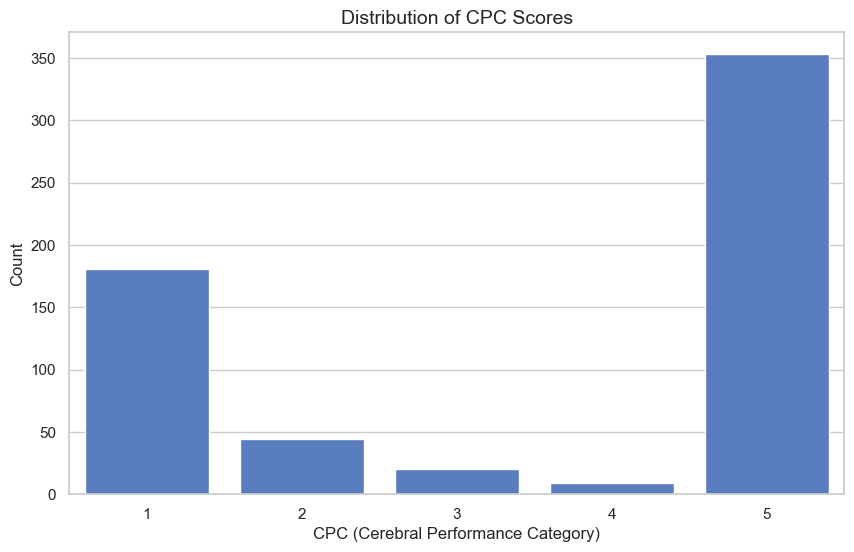

In [ ]:
# Bar plot for CPC distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cpc', data=data)
plt.title('Distribution of CPC Scores', fontsize=14)
plt.xlabel('CPC (Cerebral Performance Category)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### Analysis of CPC (Cerebral Performance Category) Scores

#### Graph: Distribution of CPC Scores
- **CPC 1 (Good neurological function)**: A significant portion of patients fall into this category, indicating a good neurological outcome for over **150 patients**.
- **CPC 2 (Moderate disability)**: Fewer patients are in this group, with only a small fraction having moderate neurological disability.
- **CPC 3 (Severe disability)** and **CPC 4 (Unresponsive wakefulness)**: Very few patients fall into these categories, indicating that a small number of patients have severe neurological damage or unresponsive states.
- **CPC 5 (Death)**: The majority of patients are in this category, with over **350 patients** recorded as deceased.

#### Key Insights:
- **Good outcomes** (CPC 1 and 2) are much less frequent compared to **poor outcomes** (CPC 3, 4, 5), especially in the CPC 5 category (death).
- The distribution highlights that a large proportion of patients either survive with **good neurological function** or do not survive at all, with fewer in-between outcomes such as moderate or severe disability.

These insights show a stark division in outcomes, with many patients either making a good recovery or passing away, and relatively few experiencing moderate to severe neurological disability.


### 9. What is the relationship between ROSC time and Out-of-hospital cardiac arrest?

ROSC (Return of Spontaneous Circulation) time is a critical factor in assessing the outcomes of cardiac arrest patients, as it reflects the duration taken to restore circulation. This time can vary significantly depending on the location of the cardiac arrest—whether it occurred in-hospital or out-of-hospital. **Out-of-hospital cardiac arrest (OHCA)** often involves longer response times, which can impact ROSC time and subsequently influence patient outcomes.

By analyzing the relationship between ROSC time and OHCA, we aim to understand how different environments (in-hospital vs. out-of-hospital) affect the recovery time for circulation and the subsequent prognosis. This analysis can reveal:
- **Differences in ROSC times** between in-hospital and out-of-hospital settings.
- **Impact of ROSC time on patient outcomes**, such as neurological recovery and survival, particularly in the context of delayed interventions common in OHCA situations.
- **Factors influencing ROSC times** in OHCA, such as response time, emergency medical intervention quality, and availability of bystander CPR.

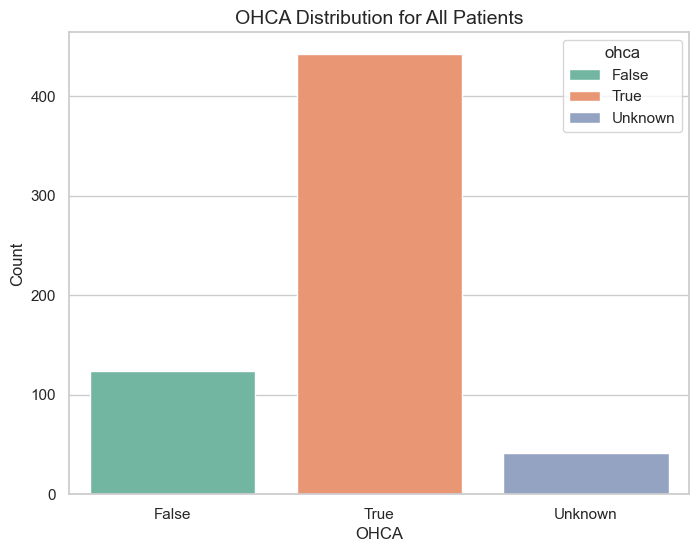

Number of observations per OHCA category (all patients):
ohca
True       442
False      124
Unknown     41
Name: count, dtype: int64

Percentage of observations per OHCA category (all patients):
ohca
True       72.817133
False      20.428336
Unknown     6.754530
Name: proportion, dtype: float64


In [ ]:
# Bar plot for the OHCA distribution of all patients
plt.figure(figsize=(8, 6))
sns.countplot(x='ohca', data=data, palette='Set2', hue='ohca')
plt.title('OHCA Distribution for All Patients', fontsize=14)
plt.xlabel('OHCA', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Print the number of observations and percentages per OHCA category (all patients)
all_ohca_count = data['ohca'].value_counts()
all_ohca_percentage = data['ohca'].value_counts(normalize=True) * 100

print("Number of observations per OHCA category (all patients):")
print(all_ohca_count)
print("\nPercentage of observations per OHCA category (all patients):")
print(all_ohca_percentage)


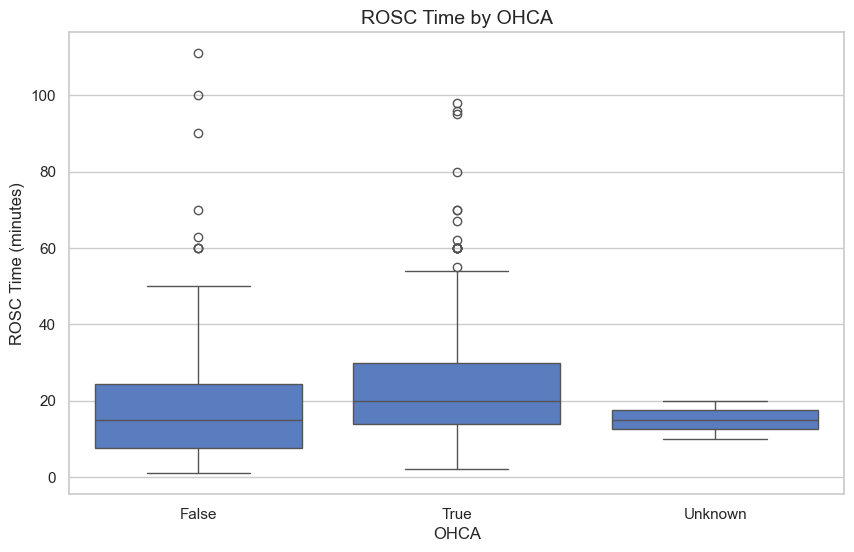

Median ROSC time by OHCA (excluding missing values):
ohca
False      15.0
True       20.0
Unknown    15.0
Name: rosc, dtype: float64

Number of observations per OHCA category (valid ROSC values):
ohca
True       205
False       95
Unknown      3
Name: count, dtype: int64


C:\Users\kentf\AppData\Local\Temp\ipykernel_19448\1748108721.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rosc_medians_cleaned = valid_data.groupby('ohca')['rosc'].median()


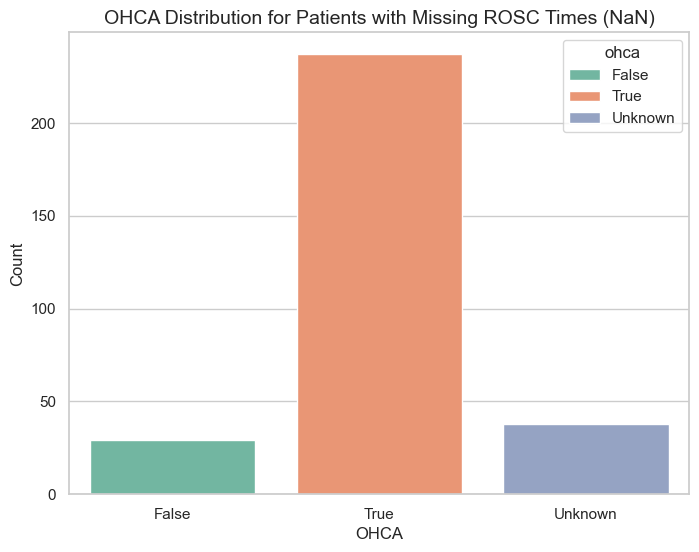


Percentage distribution of OHCA categories for patients with missing ROSC times (NaN):
ohca
True       77.960526
Unknown    12.500000
False       9.539474
Name: proportion, dtype: float64

Number of observations per OHCA category (missing ROSC values):
ohca
True       237
Unknown     38
False       29
Name: count, dtype: int64


In [ ]:
# Exclude rows where ROSC is missing (np.nan values)
valid_data = data[data['rosc'].notna()]

# Box plot for ROSC time vs OHCA using only valid ROSC data
plt.figure(figsize=(10, 6))
sns.boxplot(x='ohca', y='rosc', data=valid_data)
plt.title('ROSC Time by OHCA', fontsize=14)
plt.xlabel('OHCA', fontsize=12)
plt.ylabel('ROSC Time (minutes)', fontsize=12)
plt.show()

# Calculate the median ROSC time for each OHCA category, excluding missing values
rosc_medians_cleaned = valid_data.groupby('ohca')['rosc'].median()
print("Median ROSC time by OHCA (excluding missing values):")
print(rosc_medians_cleaned)

# Print the number of observations per OHCA category (valid ROSC)
valid_rosc_count = valid_data['ohca'].value_counts()
print("\nNumber of observations per OHCA category (valid ROSC values):")
print(valid_rosc_count)

# Filter out data where ROSC is missing (np.nan values)
missing_rosc_data = data[data['rosc'].isna()]

# Bar plot for the OHCA distribution of patients with missing ROSC times (NaN)
plt.figure(figsize=(8, 6))
sns.countplot(x='ohca', data=missing_rosc_data, palette='Set2', hue="ohca")
plt.title('OHCA Distribution for Patients with Missing ROSC Times (NaN)', fontsize=14)
plt.xlabel('OHCA', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Calculate the percentage of OHCA categories for patients with missing ROSC times (NaN)
ohca_distribution_missing_rosc = missing_rosc_data['ohca'].value_counts(normalize=True) * 100
print("\nPercentage distribution of OHCA categories for patients with missing ROSC times (NaN):")
print(ohca_distribution_missing_rosc)

# Print the number of observations per OHCA category (missing ROSC)
missing_rosc_count = missing_rosc_data['ohca'].value_counts()
print("\nNumber of observations per OHCA category (missing ROSC values):")
print(missing_rosc_count)


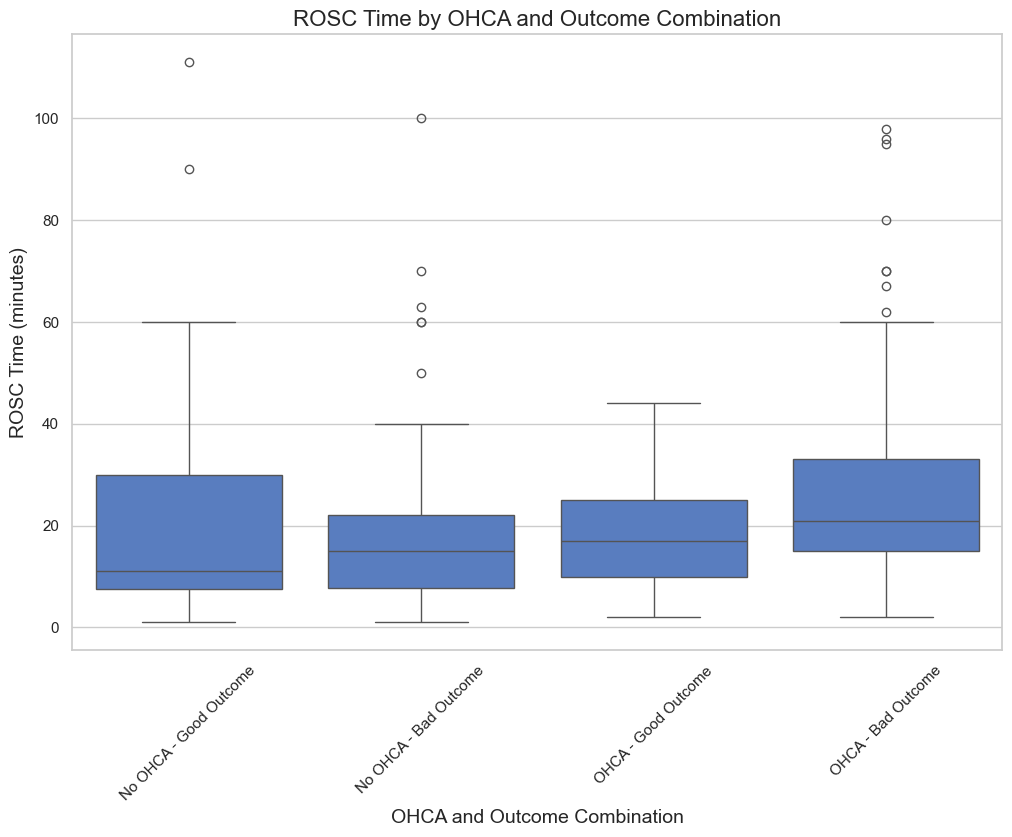

Median ROSC time by OHCA and Outcome Combination (excluding missing values):
ohca_outcome
No OHCA - Bad Outcome     15.0
No OHCA - Good Outcome    11.0
OHCA - Bad Outcome        21.0
OHCA - Good Outcome       17.0
Name: rosc, dtype: float64

Number of observations per OHCA and Outcome Combination (valid ROSC values):
ohca_outcome
OHCA - Bad Outcome        154
No OHCA - Bad Outcome      64
OHCA - Good Outcome        54
No OHCA - Good Outcome     31
Name: count, dtype: int64


In [ ]:
# Filter valid data where ROSC is not missing
valid_data = data[data['rosc'].notna()].copy()  # Use .copy() to create a deep copy

# Create a new column to represent the combination of OHCA and Outcome using .loc
valid_data.loc[:, 'ohca_outcome'] = valid_data.apply(lambda row: f"{'OHCA' if row['ohca'] else 'No OHCA'} - {'Good Outcome' if row['outcome'] == 'Good' else 'Bad Outcome'}", axis=1)

# Define the order for the box plot to ensure No OHCA categories come first
order = ['No OHCA - Good Outcome', 'No OHCA - Bad Outcome', 'OHCA - Good Outcome', 'OHCA - Bad Outcome']

# Box plot for ROSC time by OHCA and Outcome combination with specified order
plt.figure(figsize=(12, 8))
sns.boxplot(x='ohca_outcome', y='rosc', data=valid_data, order=order)
plt.title('ROSC Time by OHCA and Outcome Combination', fontsize=16)
plt.xlabel('OHCA and Outcome Combination', fontsize=14)
plt.ylabel('ROSC Time (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Calculate the median ROSC time for each OHCA and Outcome category
rosc_medians_cleaned = valid_data.groupby('ohca_outcome', observed=False)['rosc'].median()
print("Median ROSC time by OHCA and Outcome Combination (excluding missing values):")
print(rosc_medians_cleaned)

# Print the number of observations per OHCA and Outcome category
valid_rosc_count = valid_data['ohca_outcome'].value_counts()
print("\nNumber of observations per OHCA and Outcome Combination (valid ROSC values):")
print(valid_rosc_count)


### Conclusion: Relationship Between ROSC Time and Out-of-Hospital Cardiac Arrest (OHCA)

The analysis of ROSC times with respect to the occurrence of out-of-hospital cardiac arrest (OHCA) and patient outcomes provides key insights:

1. **ROSC Time Distribution**:
   - The **boxplot** comparing ROSC times for different categories of OHCA and outcomes shows that patients with **OHCA** tend to have longer ROSC times compared to those without OHCA.
   - The **median ROSC time** is generally higher for patients with **OHCA and a poor outcome** compared to other categories, indicating that longer ROSC times may be associated with worse outcomes, particularly in OHCA situations.

2. **OHCA Distribution**:
   - The **OHCA distribution for all patients** shows that the majority of patients had an OHCA, with a significantly larger proportion compared to in-hospital arrests.
   - In the **subset of patients with missing ROSC times**, a similar trend is observed: most of these patients had OHCA. This indicates a strong association between missing ROSC times and OHCA, suggesting that the circumstances of an OHCA may contribute to incomplete ROSC time data, possibly due to challenges in timely medical intervention or data collection.

3. **Insights on Patient Outcomes**:
   - The differences in ROSC times between OHCA and in-hospital cases highlight the **challenges faced in out-of-hospital resuscitation**, such as increased response times and variability in the availability of immediate medical care.
   - The **higher variability in ROSC times** for OHCA patients with poor outcomes suggests that prolonged efforts to restore circulation may be a key factor in determining overall prognosis. This emphasizes the importance of rapid response in improving patient outcomes, especially in OHCA scenarios.

Overall, the findings indicate that **OHCA is linked to longer ROSC times and poorer outcomes**, emphasizing the need for improved pre-hospital care and faster emergency response to enhance the chances of favorable recovery in these patients.

The duration of return of spontaneous circulation (ROSC) tends to be longer for out-of-hospital cardiac arrests (OHCA) compared to in-hospital cardiac arrests (IHCA), primarily due to delays inherent in emergency response and resuscitation logistics. For OHCA, the response time to reach the patient and initiate treatment is often prolonged, especially in settings with longer transport distances to hospitals, impacting ROSC times and overall outcomes (1).
Additionally, the variable quality and timing of bystander cardiopulmonary resuscitation (CPR) in OHCA contribute to longer ROSC times. Even when bystanders provide CPR, it often lacks the effectiveness of advanced life support administered in a hospital setting, leading to delays in effective resuscitation and extended ROSC durations. Moreover, the management of OHCA cases typically involves prolonged resuscitation efforts, especially when initial measures are unsuccessful, as practitioners often persist in attempts to stabilize the patient during transport. This contrasts with IHCA scenarios, where immediate access to advanced medical equipment and personnel typically results in quicker ROSC times and more favorable outcomes. Studies suggest that median ROSC times in OHCA cases can exceed 20-30 minutes, especially in "refractory OHCA," where ongoing CPR is required even upon arrival at the hospital (2).

REFERENCES:

(1) Nerla R, Webb I, MacCarthy P. Out-of-hospital cardiac arrest: contemporary management and future perspectives. Heart. 2015 Sep 15;101(18):1505-16.

(2) Ravn A, Helgestad OKL, Vestergaard LB, et al. Refractory out-of-hospital cardiac arrest with ongoing cardiopulmonary resuscitation at hospital arrival: survival and neurological outcome without extracorporeal cardiopulmonary resuscitation. Critical Care. 2021;25:240.




Summarizing most of the features characteristics and distributions found in our dataset are an accurate reflection of what is reported in the literature. TTM is still a controversial subject, particularly in the OHCA population with non shockable rhythm . Our aim is to uncover whether this subpopulation of cardiac arrest patients may benefit from lower (33 C) temperatures in terms of outcome vs a higher targeted temprature approach (36 C).
